In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'grupo-bimbo-inventory-demand:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5274592%2F8775964%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241013%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241013T151351Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1fb87f95bc0669115aada4f078a8ae0f2d4fddaa32667e67d6a5d18948f42a2907ede6fc00097b59db3368d2de82d118f933621720e4caaf6409406e43b5b466aadbe02c8e11a157991620c72da3125decd883d0fdf589f1df607c52e2c9d05256c17de5769b7d84ae87bb2138d003208cbee902d674bbd2a7ceb6f11c9d2baf4b2c7d710ff35b5951bee9bb55996c35fefac3fb5855f553a20e6dbb08594759fc7ede8111712e691710818ff0d8a245c56a1521f1dbca4abe2881f79ed2b1338d72c41a41a2e7375c524169eefc95313f452a7320f77491c549352f0dc9709fc87980b8b3d72eee343d241e22384f5cdb65fa1f757907eb32757202b2b20ba4'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/grupo-bimbo-inventory-demand/town_state.csv
/kaggle/input/grupo-bimbo-inventory-demand/cliente_tabla.csv
/kaggle/input/grupo-bimbo-inventory-demand/producto_tabla.csv
/kaggle/input/grupo-bimbo-inventory-demand/train.csv
/kaggle/input/grupo-bimbo-inventory-demand/test.csv


# Import libraries

In [ ]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/grupo-bimbo-inventory-demand/town_state.csv
/kaggle/input/grupo-bimbo-inventory-demand/cliente_tabla.csv
/kaggle/input/grupo-bimbo-inventory-demand/producto_tabla.csv
/kaggle/input/grupo-bimbo-inventory-demand/train.csv
/kaggle/input/grupo-bimbo-inventory-demand/test.csv


In [ ]:
import re
from pandas.core.dtypes.dtypes import CategoricalDtype
from scipy.stats import norm, skew
from scipy.special import boxcox1p
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option("display.max_columns", 81)
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_colwidth", 100)

import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning)
wrn.filterwarnings('ignore', category = FutureWarning)
wrn.filterwarnings('ignore', category = UserWarning)

In [ ]:
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

# Import files

In [ ]:
# Check the files
from subprocess import check_output
print(check_output(["ls", "../input/grupo-bimbo-inventory-demand/"]).decode("utf8"))

cliente_tabla.csv
producto_tabla.csv
test.csv
town_state.csv
train.csv



## train ##

In [ ]:
dtype = {
    'Semana': 'int8',
    'Agencia_ID': 'int16',
    'Canal_ID': 'int8',
    'Ruta_SAK': 'int16',
    'Cliente_ID': 'int32',
    'Producto_ID': 'int32',
    'Venta_uni_hoy': 'int16',
    'Venta_hoy': 'float32',
    'Dev_uni_proxima': 'int32',
    'Dev_proxima': 'float32',
    'Demanda_uni_equil': 'int16',
}
data_df = pd.read_csv("/kaggle/input/grupo-bimbo-inventory-demand/train.csv", dtype=dtype)
print(f'train\'s shape: {data_df.shape}')
data_df.head()

train's shape: (74180464, 11)


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,1212,3,25.140,0,0.000,3
1,3,1110,7,3301,15766,1216,4,33.520,0,0.000,4
2,3,1110,7,3301,15766,1238,4,39.320,0,0.000,4
3,3,1110,7,3301,15766,1240,4,33.520,0,0.000,4
4,3,1110,7,3301,15766,1242,3,22.920,0,0.000,3


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74180464 entries, 0 to 74180463
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Semana             int8   
 1   Agencia_ID         int16  
 2   Canal_ID           int8   
 3   Ruta_SAK           int16  
 4   Cliente_ID         int32  
 5   Producto_ID        int32  
 6   Venta_uni_hoy      int16  
 7   Venta_hoy          float32
 8   Dev_uni_proxima    int32  
 9   Dev_proxima        float32
 10  Demanda_uni_equil  int16  
dtypes: float32(2), int16(4), int32(3), int8(2)
memory usage: 2.1 GB


## town_state ##

In [ ]:
dtype = {'Agencia_ID': 'int16'}
town_state_df = pd.read_csv("/kaggle/input/grupo-bimbo-inventory-demand/town_state.csv", dtype=dtype)
town_state_df['Town_ID'] = town_state_df.Town.apply(lambda x: x.split(' ')[0]).astype('int16')
town_state_df['Town_name'] = town_state_df.Town.apply(lambda x: ' '.join(x.split(' ')[1:]))

print(f'town_state\'s shape: {town_state_df.shape}')
town_state_df.head(5)

town_state's shape: (790, 5)


,Agencia_ID,Town,State,Town_ID,Town_name
0,1110,2008 AG. LAGO FILT,"MÉXICO, D.F.",2008,AG. LAGO FILT
1,1111,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F.",2002,AG. AZCAPOTZALCO
2,1112,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO,2004,AG. CUAUTITLAN
3,1113,2008 AG. LAGO FILT,"MÉXICO, D.F.",2008,AG. LAGO FILT
4,1114,2029 AG.IZTAPALAPA 2,"MÉXICO, D.F.",2029,AG.IZTAPALAPA 2


In [ ]:
town_state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Agencia_ID  790 non-null    int16 
 1   Town        790 non-null    object
 2   State       790 non-null    object
 3   Town_ID     790 non-null    int16 
 4   Town_name   790 non-null    object
dtypes: int16(2), object(3)
memory usage: 21.7+ KB


## producto_tabla ##

In [ ]:
product_df = pd.read_csv("/kaggle/input/grupo-bimbo-inventory-demand/producto_tabla.csv")
product_df.head(5)

,Producto_ID,NombreProducto
0,0,NO IDENTIFICADO 0
1,9,Capuccino Moka 750g NES 9
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41
3,53,Burritos Sincro 170g CU LON 53
4,72,Div Tira Mini Doradita 4p 45g TR 72


In [ ]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Producto_ID     2592 non-null   int64 
 1   NombreProducto  2592 non-null   object
dtypes: int64(1), object(1)
memory usage: 40.6+ KB


# Preprocessing

## Time series features

In [ ]:
for i in range(1, 4):
    columns = ['Semana', 'Agencia_ID', 'Producto_ID', 'Demanda_uni_equil']
    train_tminus = data_df.loc[:, columns]
    train_tminus = train_tminus.rename(columns = {'Demanda_uni_equil': 'Demanda_uni_equil_tminus' + str(i)})
    train_tminus['Semana'] = train_tminus['Semana'] + i
    columns.remove('Demanda_uni_equil')
    train_tminus = pd.DataFrame({'Demanda_uni_equil_tminus' + str(i) : train_tminus.groupby(columns)['Demanda_uni_equil_tminus' + str(i)].sum()}).reset_index()
    data_df = data_df.merge(train_tminus, how = 'left', on = ['Semana','Agencia_ID', 'Producto_ID'])
    data_df['Demanda_uni_equil_tminus' + str(i)] = data_df['Demanda_uni_equil_tminus' + str(i)]
data_df.loc[data_df['Demanda_uni_equil_tminus' + str(i)].isnull(), 'Demanda_uni_equil_tminus' + str(i)] = 0

In [ ]:
# Remove observations from week 5 and earlier
print("Before removing observations, train_df's shape: "+ str(data_df.shape))
data_df = data_df[data_df['Semana'] > 5]
data_df = data_df.reset_index(drop=True)
print("After removing observations, train_df's shape: " + str(data_df.shape))

Before removing observations, train_df's shape: (74180464, 14)
After removing observations, train_df's shape: (41390267, 14)


## Add Number of Client ##

In [ ]:
count_client_df = data_df.groupby(['Semana','Agencia_ID', 'Producto_ID'])['Cliente_ID'].nunique().reset_index()
count_client_df

,Semana,Agencia_ID,Producto_ID,Cliente_ID
0,6,1110,73,1
1,6,1110,108,6
2,6,1110,145,47
3,6,1110,163,2
4,6,1110,202,38
...,...,...,...,...
273758,9,25759,48577,31
273759,9,25759,48578,69
273760,9,25759,48861,7
273761,9,25759,48891,1


In [ ]:
count_client_df = count_client_df.rename(columns={'Cliente_ID': 'Client_Count'})
data_df = data_df.merge(count_client_df, on=['Semana','Agencia_ID', 'Producto_ID'], how='left')
del count_client_df

## Add Number of Route

In [ ]:
count_ruta_df = data_df.groupby(['Semana','Agencia_ID', 'Producto_ID'])['Ruta_SAK'].nunique().reset_index()
count_ruta_df

,Semana,Agencia_ID,Producto_ID,Ruta_SAK
0,6,1110,73,1
1,6,1110,108,4
2,6,1110,145,17
3,6,1110,163,1
4,6,1110,202,8
...,...,...,...,...
273758,9,25759,48577,10
273759,9,25759,48578,19
273760,9,25759,48861,4
273761,9,25759,48891,1


In [ ]:
count_ruta_df = count_ruta_df.rename(columns={'Ruta_SAK': 'Ruta_Count'})
data_df = data_df.merge(count_ruta_df, on=['Semana','Agencia_ID', 'Producto_ID'], how='left')
del count_ruta_df

## Remove unnecessary columns ##

In [ ]:
data_df.drop(['Ruta_SAK', 'Cliente_ID','Canal_ID','Venta_hoy', 'Dev_proxima'], axis=1, inplace=True)

In [ ]:
data_df.head()

,Semana,Agencia_ID,Producto_ID,Venta_uni_hoy,Dev_uni_proxima,Demanda_uni_equil,Demanda_uni_equil_tminus1,Demanda_uni_equil_tminus2,Demanda_uni_equil_tminus3,Client_Count,Ruta_Count
0,6,1110,1216,1,0,1,416.000,551.000,559.000,97,18
1,6,1110,1238,2,0,2,1068.000,1211.000,1276.000,163,22
2,6,1110,1242,3,0,3,1066.000,1432.000,1324.000,181,20
3,6,1110,1250,1,0,1,6148.000,5471.000,6000.000,313,24
4,6,1110,1309,6,0,6,775.000,860.000,896.000,130,22


## Group by ##

In [ ]:
num_duplicates = data_df.duplicated().sum()
num_duplicates

37706914

In [ ]:
group_columns = ['Semana', 'Agencia_ID', 'Producto_ID', 'Client_Count','Ruta_Count',
                'Demanda_uni_equil_tminus1',
    'Demanda_uni_equil_tminus2',
    'Demanda_uni_equil_tminus3',]
sum_columns = [
    'Venta_uni_hoy',
    'Dev_uni_proxima',
    'Demanda_uni_equil']

data_df = data_df.groupby(group_columns)[sum_columns].sum().reset_index()

data_df.head()

,Semana,Agencia_ID,Producto_ID,Client_Count,Ruta_Count,Demanda_uni_equil_tminus1,Demanda_uni_equil_tminus2,Demanda_uni_equil_tminus3,Venta_uni_hoy,Dev_uni_proxima,Demanda_uni_equil
0,6,1110,73,1,1,12.000,24.000,18.000,6,0,6
1,6,1110,108,6,4,552.000,584.000,656.000,268,0,268
2,6,1110,145,47,17,1126.000,748.000,849.000,1347,0,1347
3,6,1110,163,2,1,2.000,5.000,3.000,2,0,2
4,6,1110,202,38,8,644.000,647.000,666.000,607,0,607


In [ ]:
num_duplicates = data_df.duplicated().sum()
num_duplicates

0

In [ ]:
data_df.shape

(244548, 11)

## Check null values ##

In [ ]:
data_df.isnull().sum()

Semana                       0
Agencia_ID                   0
Producto_ID                  0
Client_Count                 0
Ruta_Count                   0
Demanda_uni_equil_tminus1    0
Demanda_uni_equil_tminus2    0
Demanda_uni_equil_tminus3    0
Venta_uni_hoy                0
Dev_uni_proxima              0
Demanda_uni_equil            0
dtype: int64

## PS Extract name

In [ ]:
product_df['Popular_Name'] = product_df.NombreProducto.str.extract(r'^(.*?)(\d*\s\d+(kg|Kg|g|G|ml| ml|p|Reb)\s)', expand=False)[0]

print(f'product_df\'s shape: {product_df.shape}')
product_df.head(5)

product_df's shape: (2592, 3)


,Producto_ID,NombreProducto,Popular_Name
0,0,NO IDENTIFICADO 0,NaN
1,9,Capuccino Moka 750g NES 9,Capuccino Moka
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41,Bimbollos Ext sAjonjoli
3,53,Burritos Sincro 170g CU LON 53,Burritos Sincro
4,72,Div Tira Mini Doradita 4p 45g TR 72,Div Tira Mini Doradita


In [ ]:
product_df[product_df['Popular_Name'].isnull()]

,Producto_ID,NombreProducto,Popular_Name
0,0,NO IDENTIFICADO 0,NaN
117,1289,Donas 6P Prom BIM 1289,NaN
162,2575,Vasos 226 8g8oz NES 2575,NaN
190,3509,Paletina para Cafe NES 3509,NaN
381,30099,Camioncitos Bimbo BIM 30099,NaN
409,30280,Camioncito Bimbo Modelo 3 BIM 30280,NaN
528,30958,Empanzador Crujiente Prom BIM 30958,NaN
877,32841,Tortilla Hna Chihuahua 10p535g SP MTA DH 32841,NaN
1044,33862,Choco Roles Fresa 3X10 Prom MLA 33862,NaN
1045,33863,Choco Roles Fresa 3X10 Prom MTB MLA 33863,NaN


In [ ]:
product_df.loc[0, 'Popular_Name'] = 'NO IDENTIFICADO'
product_df.loc[117, 'Popular_Name'] = 'Donas'
product_df.loc[162, 'Popular_Name'] = 'Vasos'
product_df.loc[190, 'Popular_Name'] = 'Paletina para Cafe'
product_df.loc[381, 'Popular_Name'] = 'Camioncitos Bimbo'
product_df.loc[409, 'Popular_Name'] = 'Camioncito Bimbo Modelo'
product_df.loc[528, 'Popular_Name'] = 'Empanzador Crujiente Prom'
product_df.loc[877, 'Popular_Name'] = 'Tortilla Hna Chihuahua'
product_df.loc[1044, 'Popular_Name'] = 'Choco Roles Fresa'
product_df.loc[1045, 'Popular_Name'] = 'Choco Roles Fresa'
product_df.loc[1152, 'Popular_Name'] = 'Burrito Vaporero FrijolChorizo'
product_df.loc[1335, 'Popular_Name'] = 'DuoBarrita Fsa GalletaGansito'
product_df.loc[1336, 'Popular_Name'] = 'DuoBarrita Fsa GalletaGansito'
product_df.loc[1389, 'Popular_Name'] = 'Exhibidor PDQ Bran Frut'
product_df.loc[1485, 'Popular_Name'] = 'Almohada del Osito Bimbo'
product_df.loc[1585, 'Popular_Name'] = 'Principe Cho Bco MG'
product_df.loc[1677, 'Popular_Name'] = 'Tarima Twin Pack Thins Multig'
product_df.loc[1688, 'Popular_Name'] = 'Servilletero Bimbollos'
product_df.loc[1748, 'Popular_Name'] = 'Combo Salma mas Levite'
product_df.loc[1749, 'Popular_Name'] = 'Combo Salma mas Levite'
product_df.loc[1750, 'Popular_Name'] = 'Combo Tos Clas mas Sals'
product_df.loc[1888, 'Popular_Name'] = 'Deliciosas Chochochispas'
product_df.loc[1889, 'Popular_Name'] = 'Deliciosas Chochochispas'
product_df.loc[1890, 'Popular_Name'] = 'Deliciosas Chochochispas'
product_df.loc[1922, 'Popular_Name'] = 'LataCorazonChococatBesoNuez'
product_df.loc[2449, 'Popular_Name'] = 'Galleta Granel Classics Chocolate'
product_df.loc[2456, 'Popular_Name'] = 'Paletina'

In [ ]:
product_df[product_df['Popular_Name'].isnull()]

,Producto_ID,NombreProducto,Popular_Name


## Create dataframe eda_df

In [ ]:
eda_df = data_df[['Semana', 'Agencia_ID', 'Producto_ID', 'Venta_uni_hoy', 'Dev_uni_proxima', 'Demanda_uni_equil']]

In [ ]:
eda_df = eda_df.merge(product_df[['Producto_ID', 'Popular_Name']], on='Producto_ID', how='left')

In [ ]:
eda_df.head()

,Semana,Agencia_ID,Producto_ID,Venta_uni_hoy,Dev_uni_proxima,Demanda_uni_equil,Popular_Name
0,6,1110,73,6,0,6,Pan Multigrano Linaza
1,6,1110,108,268,0,268,Baguette Precocida Cong
2,6,1110,145,1347,0,1347,Super Hot Dogs
3,6,1110,163,2,0,2,Molido
4,6,1110,202,607,0,607,Bollos 5in


In [ ]:
eda_df['Producto'] = eda_df['Producto_ID'].astype(str) + ' - ' + eda_df['Popular_Name']
eda_df.head()

,Semana,Agencia_ID,Producto_ID,Venta_uni_hoy,Dev_uni_proxima,Demanda_uni_equil,Popular_Name,Producto
0,6,1110,73,6,0,6,Pan Multigrano Linaza,73 - Pan Multigrano Linaza
1,6,1110,108,268,0,268,Baguette Precocida Cong,108 - Baguette Precocida Cong
2,6,1110,145,1347,0,1347,Super Hot Dogs,145 - Super Hot Dogs
3,6,1110,163,2,0,2,Molido,163 - Molido
4,6,1110,202,607,0,607,Bollos 5in,202 - Bollos 5in


# Exploratory Data Analysis

In [ ]:
data_df.head()

,Semana,Agencia_ID,Producto_ID,Client_Count,Ruta_Count,Demanda_uni_equil_tminus1,Demanda_uni_equil_tminus2,Demanda_uni_equil_tminus3,Venta_uni_hoy,Dev_uni_proxima,Demanda_uni_equil
0,6,1110,73,1,1,12.000,24.000,18.000,6,0,6
1,6,1110,108,6,4,552.000,584.000,656.000,268,0,268
2,6,1110,145,47,17,1126.000,748.000,849.000,1347,0,1347
3,6,1110,163,2,1,2.000,5.000,3.000,2,0,2
4,6,1110,202,38,8,644.000,647.000,666.000,607,0,607


## Descriptive Statistics

In [ ]:
numerical_cols = data_df.select_dtypes(include=[np.number])
summary_stats = pd.DataFrame({
    'Count': numerical_cols.count(),
    'Min': numerical_cols.min(),
    'Max': numerical_cols.max(),
    'Mean': numerical_cols.mean(),
    'Std Dev': numerical_cols.std(),
    'Median': numerical_cols.median()
})

print(tabulate(summary_stats, headers='keys', tablefmt='fancy_grid', numalign='right'))

╒═══════════════════════════╤═════════╤═══════╤════════╤═════════╤═══════════╤══════════╕
│                           │   Count │   Min │    Max │    Mean │   Std Dev │   Median │
╞═══════════════════════════╪═════════╪═══════╪════════╪═════════╪═══════════╪══════════╡
│ Semana                    │  244548 │     6 │      9 │ 7.49856 │   1.11983 │        7 │
├───────────────────────────┼─────────┼───────┼────────┼─────────┼───────────┼──────────┤
│ Agencia_ID                │  244548 │  1110 │  25759 │ 2634.97 │   4142.48 │     1634 │
├───────────────────────────┼─────────┼───────┼────────┼─────────┼───────────┼──────────┤
│ Producto_ID               │  244548 │    41 │  49997 │ 28166.1 │   16438.2 │    33260 │
├───────────────────────────┼─────────┼───────┼────────┼─────────┼───────────┼──────────┤
│ Client_Count              │  244548 │     1 │   5320 │ 161.045 │   363.554 │       24 │
├───────────────────────────┼─────────┼───────┼────────┼─────────┼───────────┼──────────┤
│ Ruta_Cou

## Scatter Plot

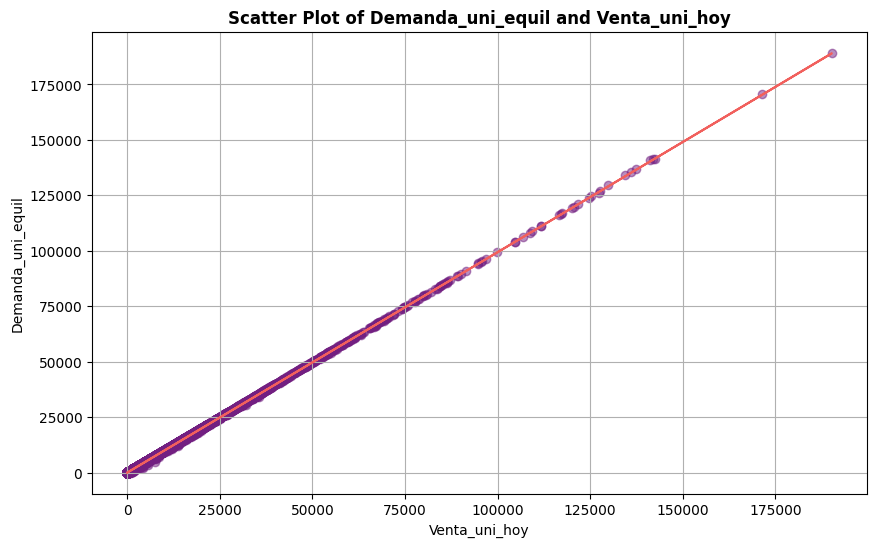

In [ ]:
# Calculate the linear regression line
x = data_df['Venta_uni_hoy']
y = data_df['Demanda_uni_equil']
m, b = np.polyfit(x, y, 1)

# Get magma color palette
magma_colors = sns.color_palette('magma', 2)
scatter_color = magma_colors[0]
line_color = magma_colors[1]

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, color=scatter_color)
plt.plot(x, m*x + b, color=line_color)
plt.title('Scatter Plot of Demanda_uni_equil and Venta_uni_hoy', fontweight ='bold')
plt.xlabel('Venta_uni_hoy')
plt.ylabel('Demanda_uni_equil')
plt.grid(True)
plt.show()

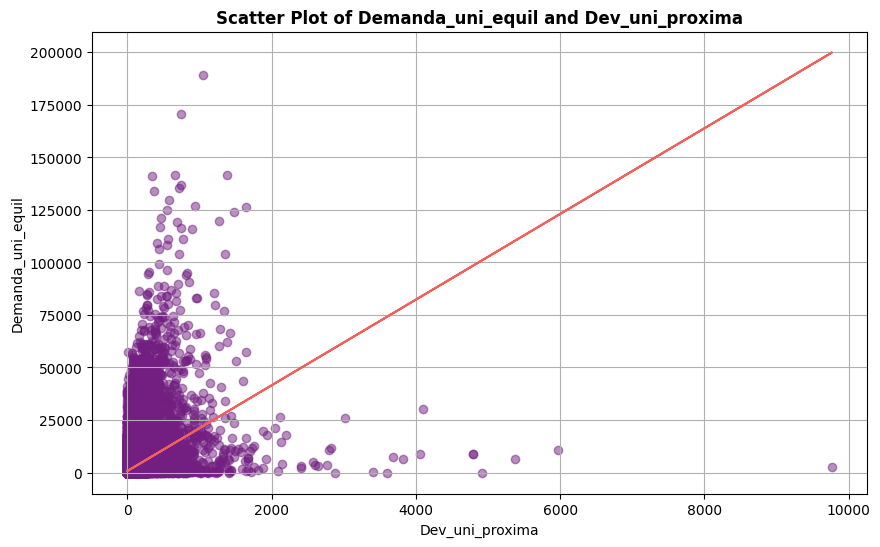

In [ ]:
# Calculate the linear regression line
x = data_df['Dev_uni_proxima']
y = data_df['Demanda_uni_equil']
m, b = np.polyfit(x, y, 1)

# Get magma color palette
magma_colors = sns.color_palette('magma', 2)
scatter_color = magma_colors[0]
line_color = magma_colors[1]

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, color=scatter_color)
plt.plot(x, m*x + b, color=line_color)
plt.title('Scatter Plot of Demanda_uni_equil and Dev_uni_proxima', fontweight = 'bold')
plt.xlabel('Dev_uni_proxima')
plt.ylabel('Demanda_uni_equil')
plt.grid(True)
plt.show()

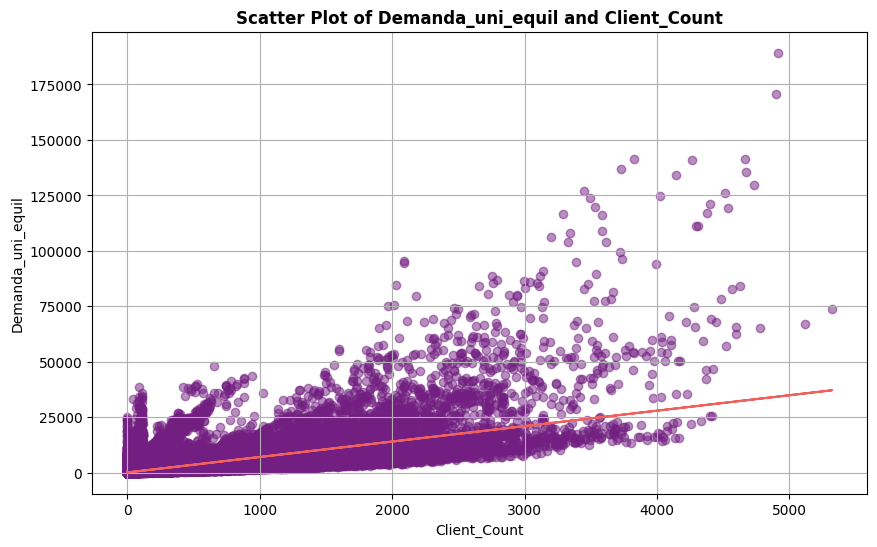

In [ ]:
# Calculate the linear regression line
x = data_df['Client_Count']
y = data_df['Demanda_uni_equil']
m, b = np.polyfit(x, y, 1)

# Get magma color palette
magma_colors = sns.color_palette('magma', 2)
scatter_color = magma_colors[0]
line_color = magma_colors[1]

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, color=scatter_color)
plt.plot(x, m*x + b, color=line_color)
plt.title('Scatter Plot of Demanda_uni_equil and Client_Count', fontweight = 'bold')
plt.xlabel('Client_Count')
plt.ylabel('Demanda_uni_equil')
plt.grid(True)
plt.show()

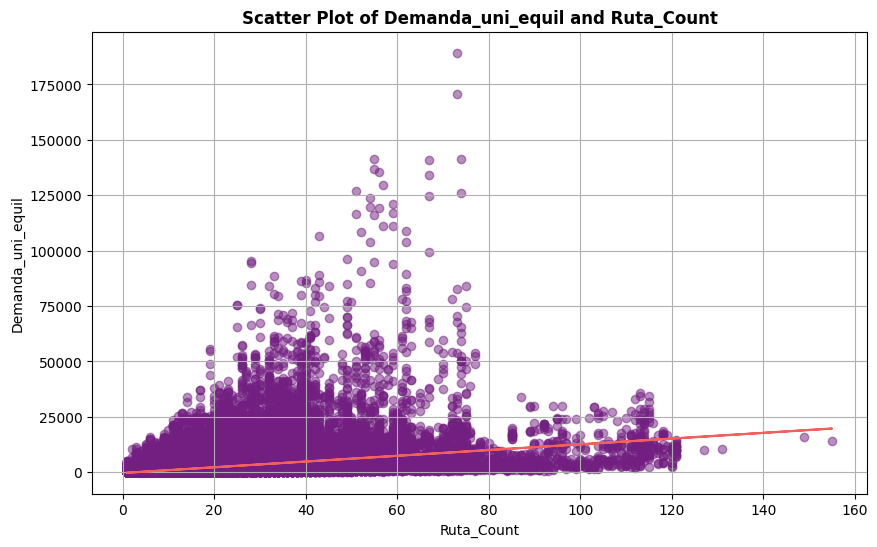

In [ ]:
# Calculate the linear regression line
x = data_df['Ruta_Count']
y = data_df['Demanda_uni_equil']
m, b = np.polyfit(x, y, 1)

# Get magma color palette
magma_colors = sns.color_palette('magma', 2)
scatter_color = magma_colors[0]
line_color = magma_colors[1]

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, color=scatter_color)
plt.plot(x, m*x + b, color=line_color)
plt.title('Scatter Plot of Demanda_uni_equil and Ruta_Count', fontweight = 'bold')
plt.xlabel('Ruta_Count')
plt.ylabel('Demanda_uni_equil')
plt.grid(True)
plt.show()

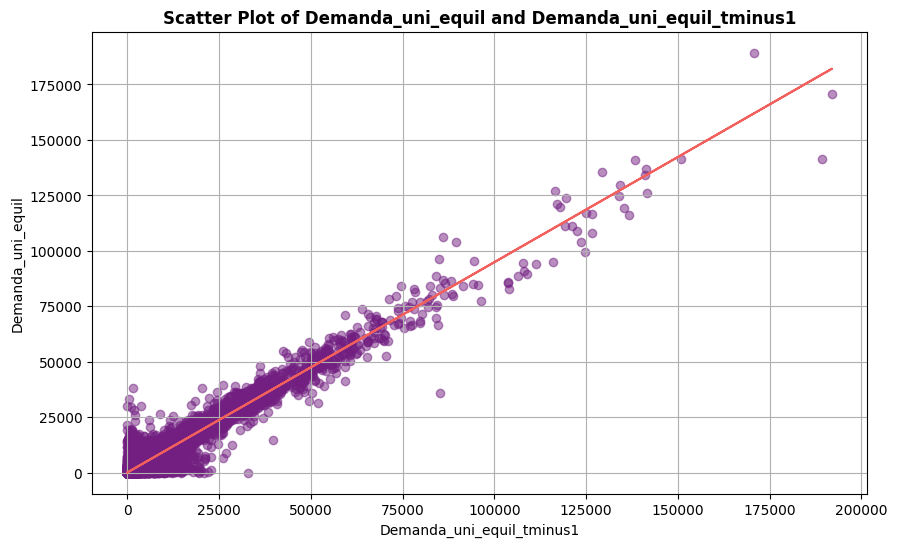

In [ ]:
# Calculate the linear regression line
x = data_df['Demanda_uni_equil_tminus1']
y = data_df['Demanda_uni_equil']
m, b = np.polyfit(x, y, 1)

# Get magma color palette
magma_colors = sns.color_palette('magma', 2)
scatter_color = magma_colors[0]
line_color = magma_colors[1]

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, color=scatter_color)
plt.plot(x, m*x + b, color=line_color)
plt.title('Scatter Plot of Demanda_uni_equil and Demanda_uni_equil_tminus1', fontweight ='bold')
plt.xlabel('Demanda_uni_equil_tminus1')
plt.ylabel('Demanda_uni_equil')
plt.grid(True)
plt.show()

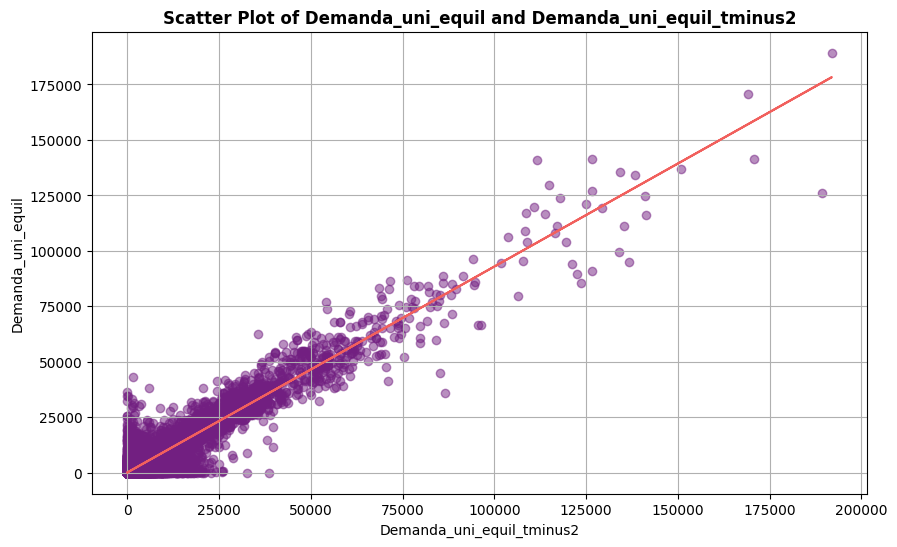

In [ ]:
# Calculate the linear regression line
x = data_df['Demanda_uni_equil_tminus2']
y = data_df['Demanda_uni_equil']
m, b = np.polyfit(x, y, 1)

# Get magma color palette
magma_colors = sns.color_palette('magma', 2)
scatter_color = magma_colors[0]
line_color = magma_colors[1]

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, color=scatter_color)
plt.plot(x, m*x + b, color=line_color)
plt.title('Scatter Plot of Demanda_uni_equil and Demanda_uni_equil_tminus2', fontweight='bold')
plt.xlabel('Demanda_uni_equil_tminus2')
plt.ylabel('Demanda_uni_equil')
plt.grid(True)
plt.show()

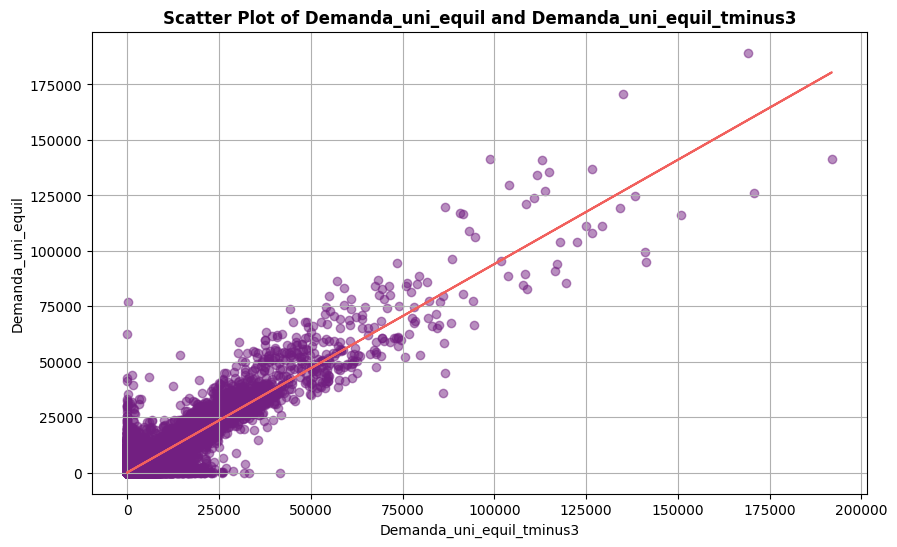

In [ ]:
# Calculate the linear regression line
x = data_df['Demanda_uni_equil_tminus3']
y = data_df['Demanda_uni_equil']
m, b = np.polyfit(x, y, 1)

# Get magma color palette
magma_colors = sns.color_palette('magma', 2)
scatter_color = magma_colors[0]
line_color = magma_colors[1]

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, color=scatter_color)
plt.plot(x, m*x + b, color=line_color)
plt.title('Scatter Plot of Demanda_uni_equil and Demanda_uni_equil_tminus3',  fontweight='bold')
plt.xlabel('Demanda_uni_equil_tminus3')
plt.ylabel('Demanda_uni_equil')
plt.grid(True)
plt.show()

## Box Plot & Distribution Plot

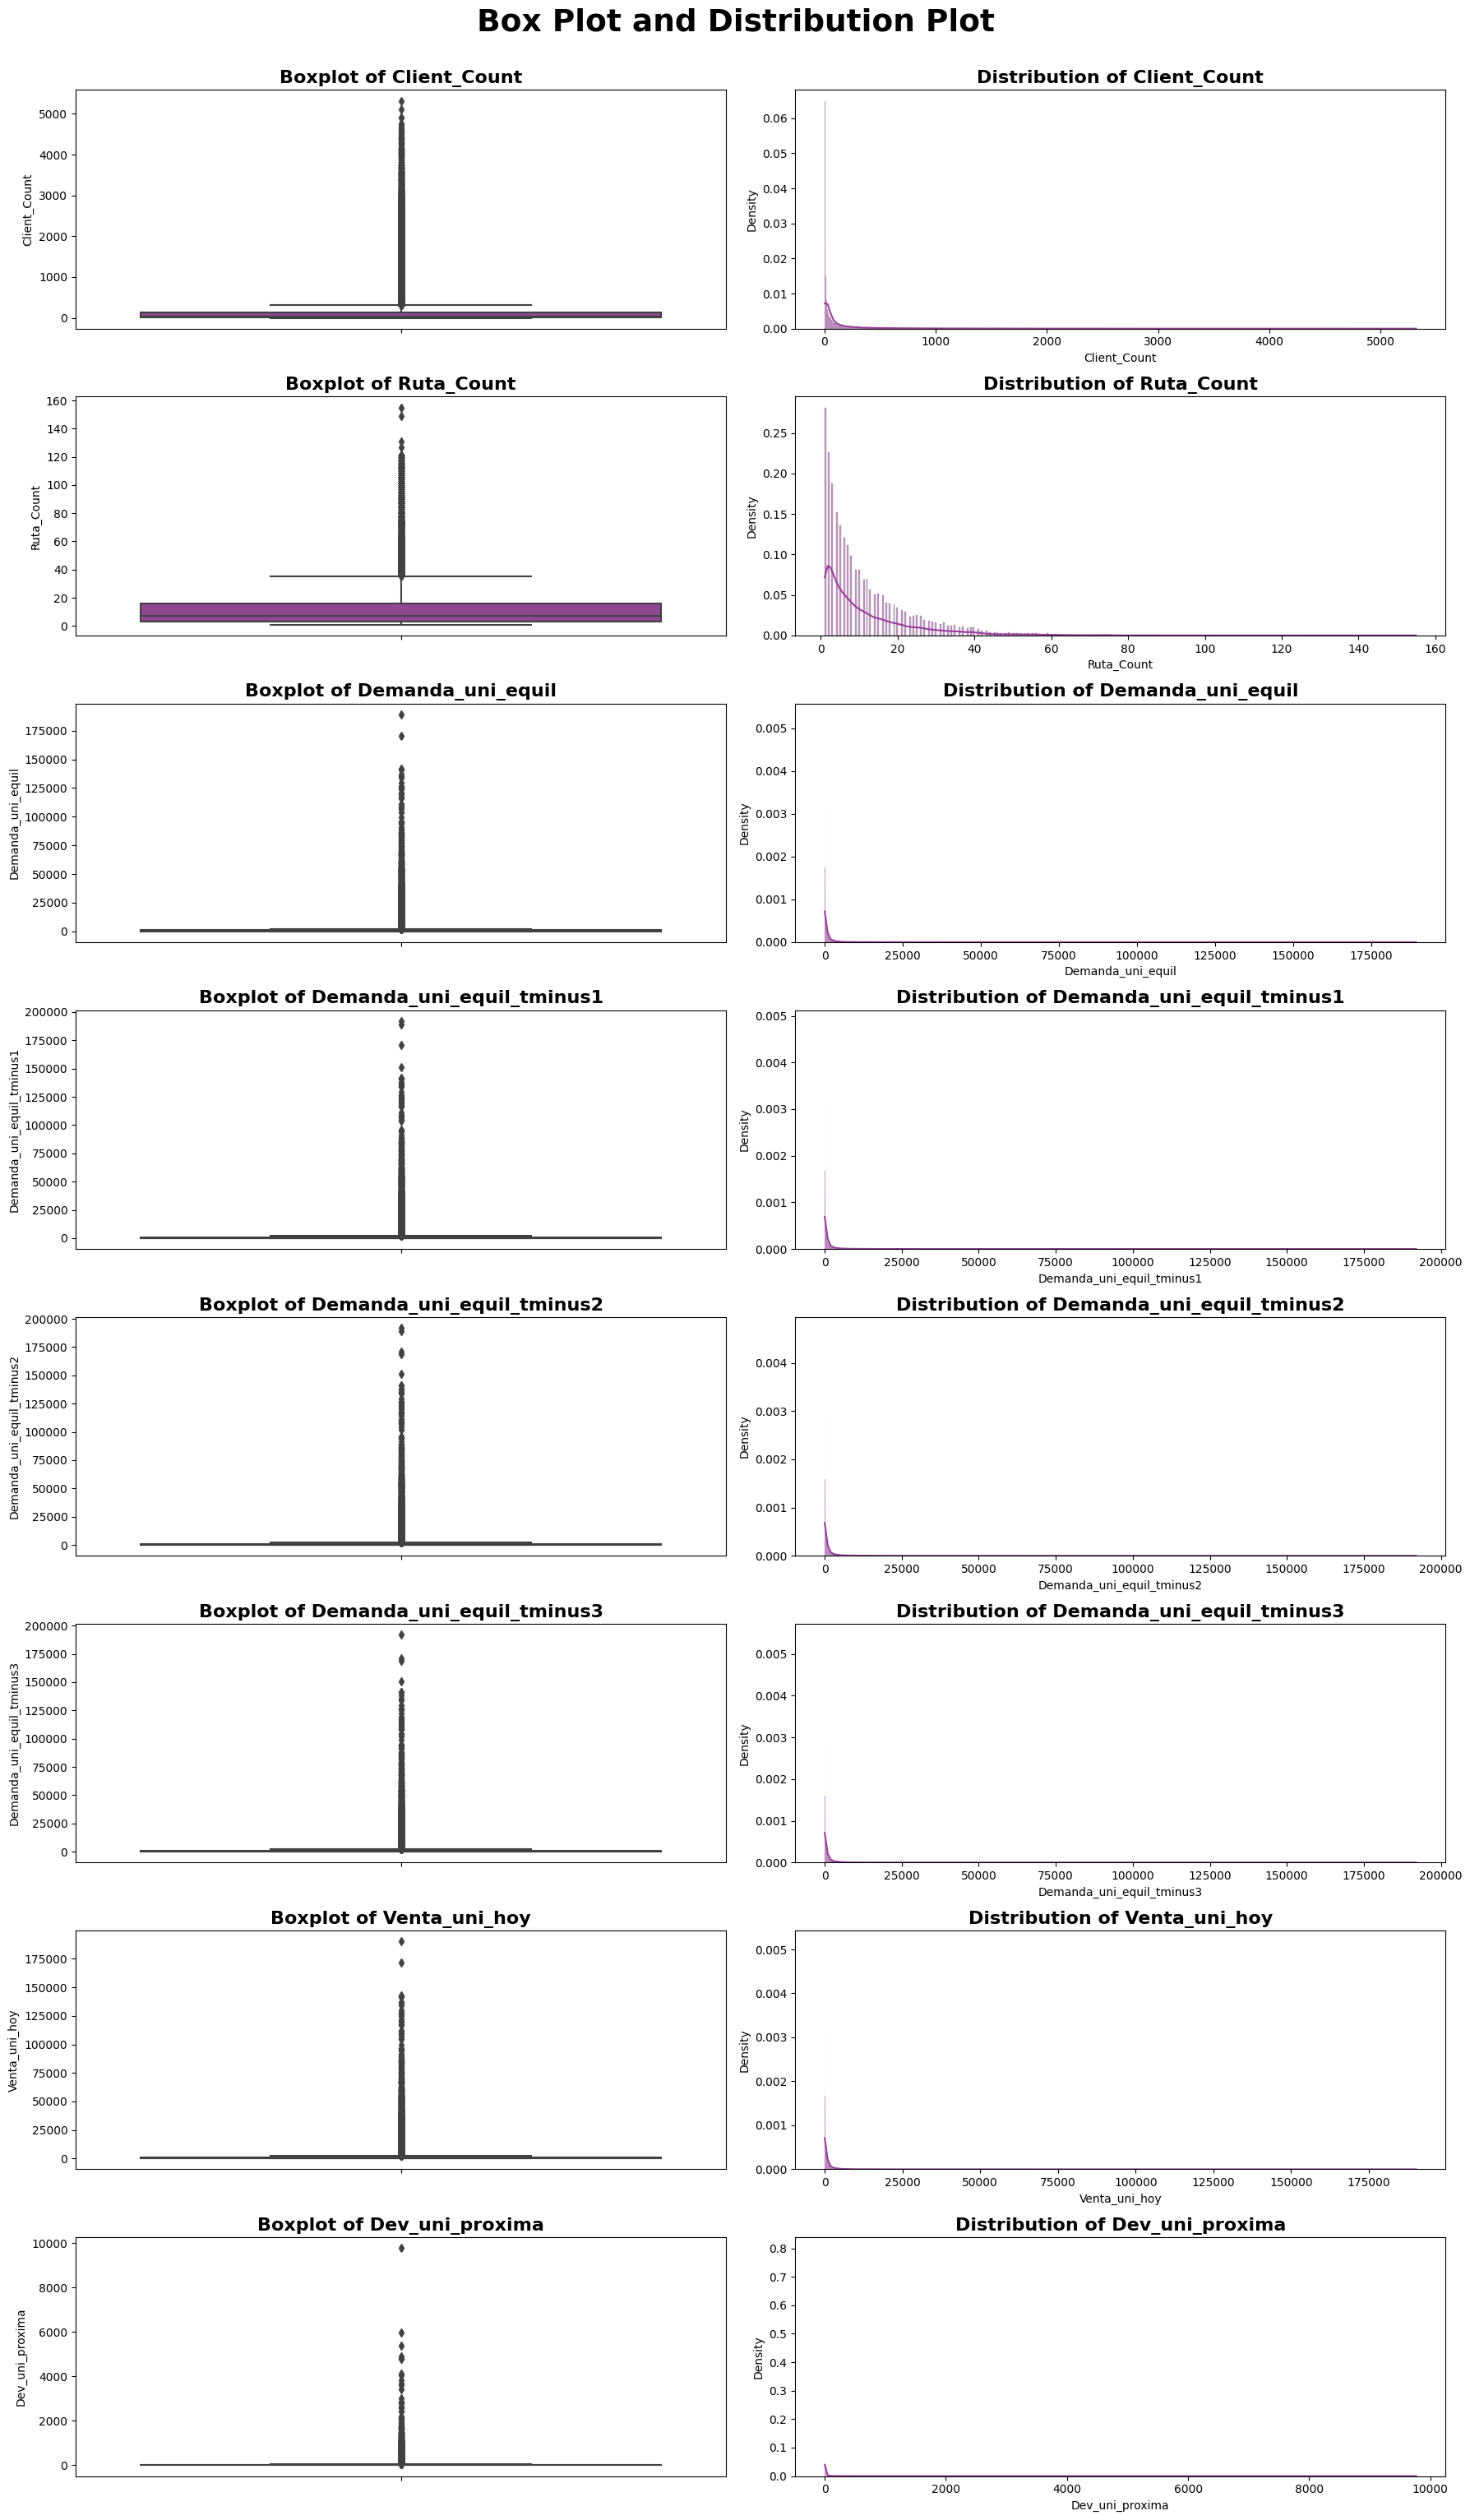

In [ ]:
plt.figure(figsize=(18, 30))

# Columns to plot
columns_to_plot = [
    'Client_Count', 'Ruta_Count', 'Demanda_uni_equil',
    'Demanda_uni_equil_tminus1', 'Demanda_uni_equil_tminus2',
    'Demanda_uni_equil_tminus3', 'Venta_uni_hoy', 'Dev_uni_proxima'
]

for i, col in enumerate(columns_to_plot):
    # Boxplot
    plt.subplot(len(columns_to_plot), 2, 2 * i + 1)
    sns.boxplot(y=data_df[col], color='#9a3c9d')
    plt.title(f'Boxplot of {col}', fontsize=16, fontweight='bold')

    # Distribution plot
    plt.subplot(len(columns_to_plot), 2, 2 * i + 2)
    sns.histplot(data_df[col], kde=True, stat='density', color='#9a3c9d')
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.suptitle('Box Plot and Distribution Plot', fontsize=27, fontweight='bold', y=1.02)
plt.show()


## Correlation

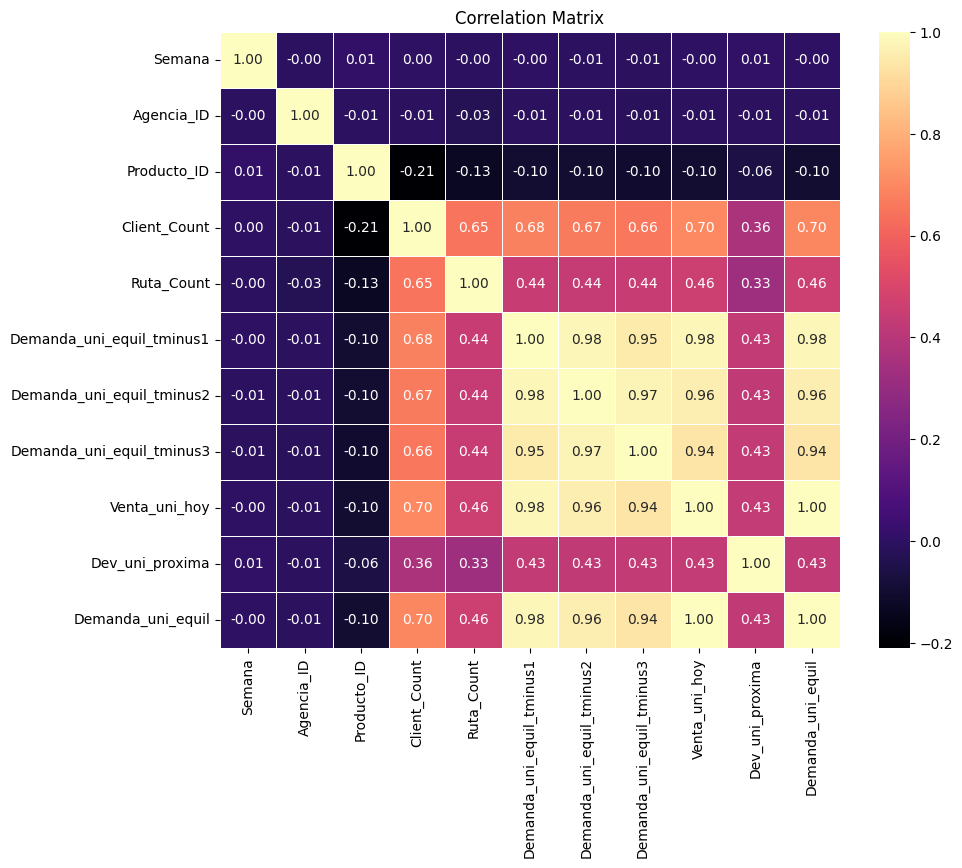

In [ ]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_df.corr(), annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Visualization

## Total Quantities by Week

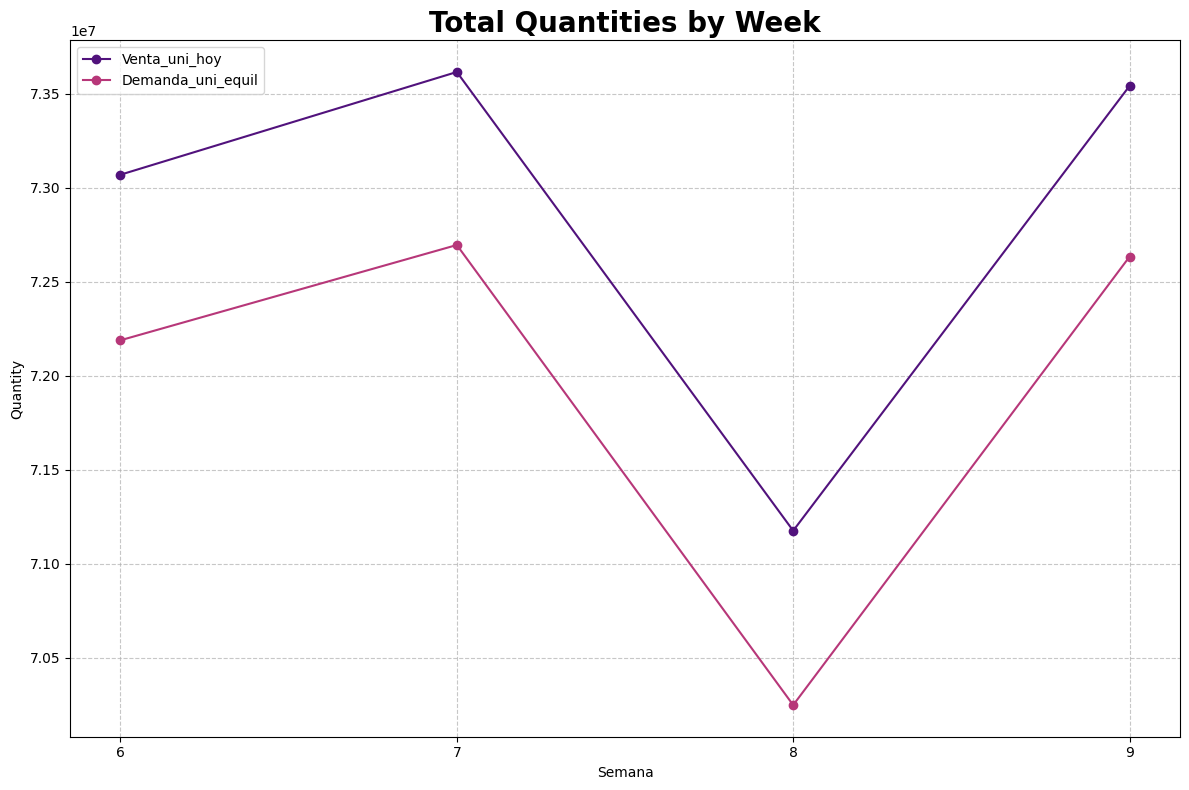

In [ ]:
# Calculate the total quantities for each week
weekly_data = eda_df.groupby('Semana').agg({
    'Venta_uni_hoy': 'sum',
    'Dev_uni_proxima': 'sum',
    'Demanda_uni_equil': 'sum'
}).reset_index()

# Plot the line chart
plt.figure(figsize=(12, 8))

# Get magma color palette
magma_colors = sns.color_palette('magma', 3)

# Plot lines for each quantity type
plt.plot(weekly_data['Semana'], weekly_data['Venta_uni_hoy'], marker='o', label='Venta_uni_hoy', color=magma_colors[0])
plt.plot(weekly_data['Semana'], weekly_data['Demanda_uni_equil'], marker='o', label='Demanda_uni_equil', color=magma_colors[1])

# Add title and axis labels
plt.title('Total Quantities by Week', fontweight='bold', fontsize =20)
plt.xlabel('Semana')
plt.ylabel('Quantity')
plt.xticks(weekly_data['Semana'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Top 3 Products with the Most Inventory Each Week

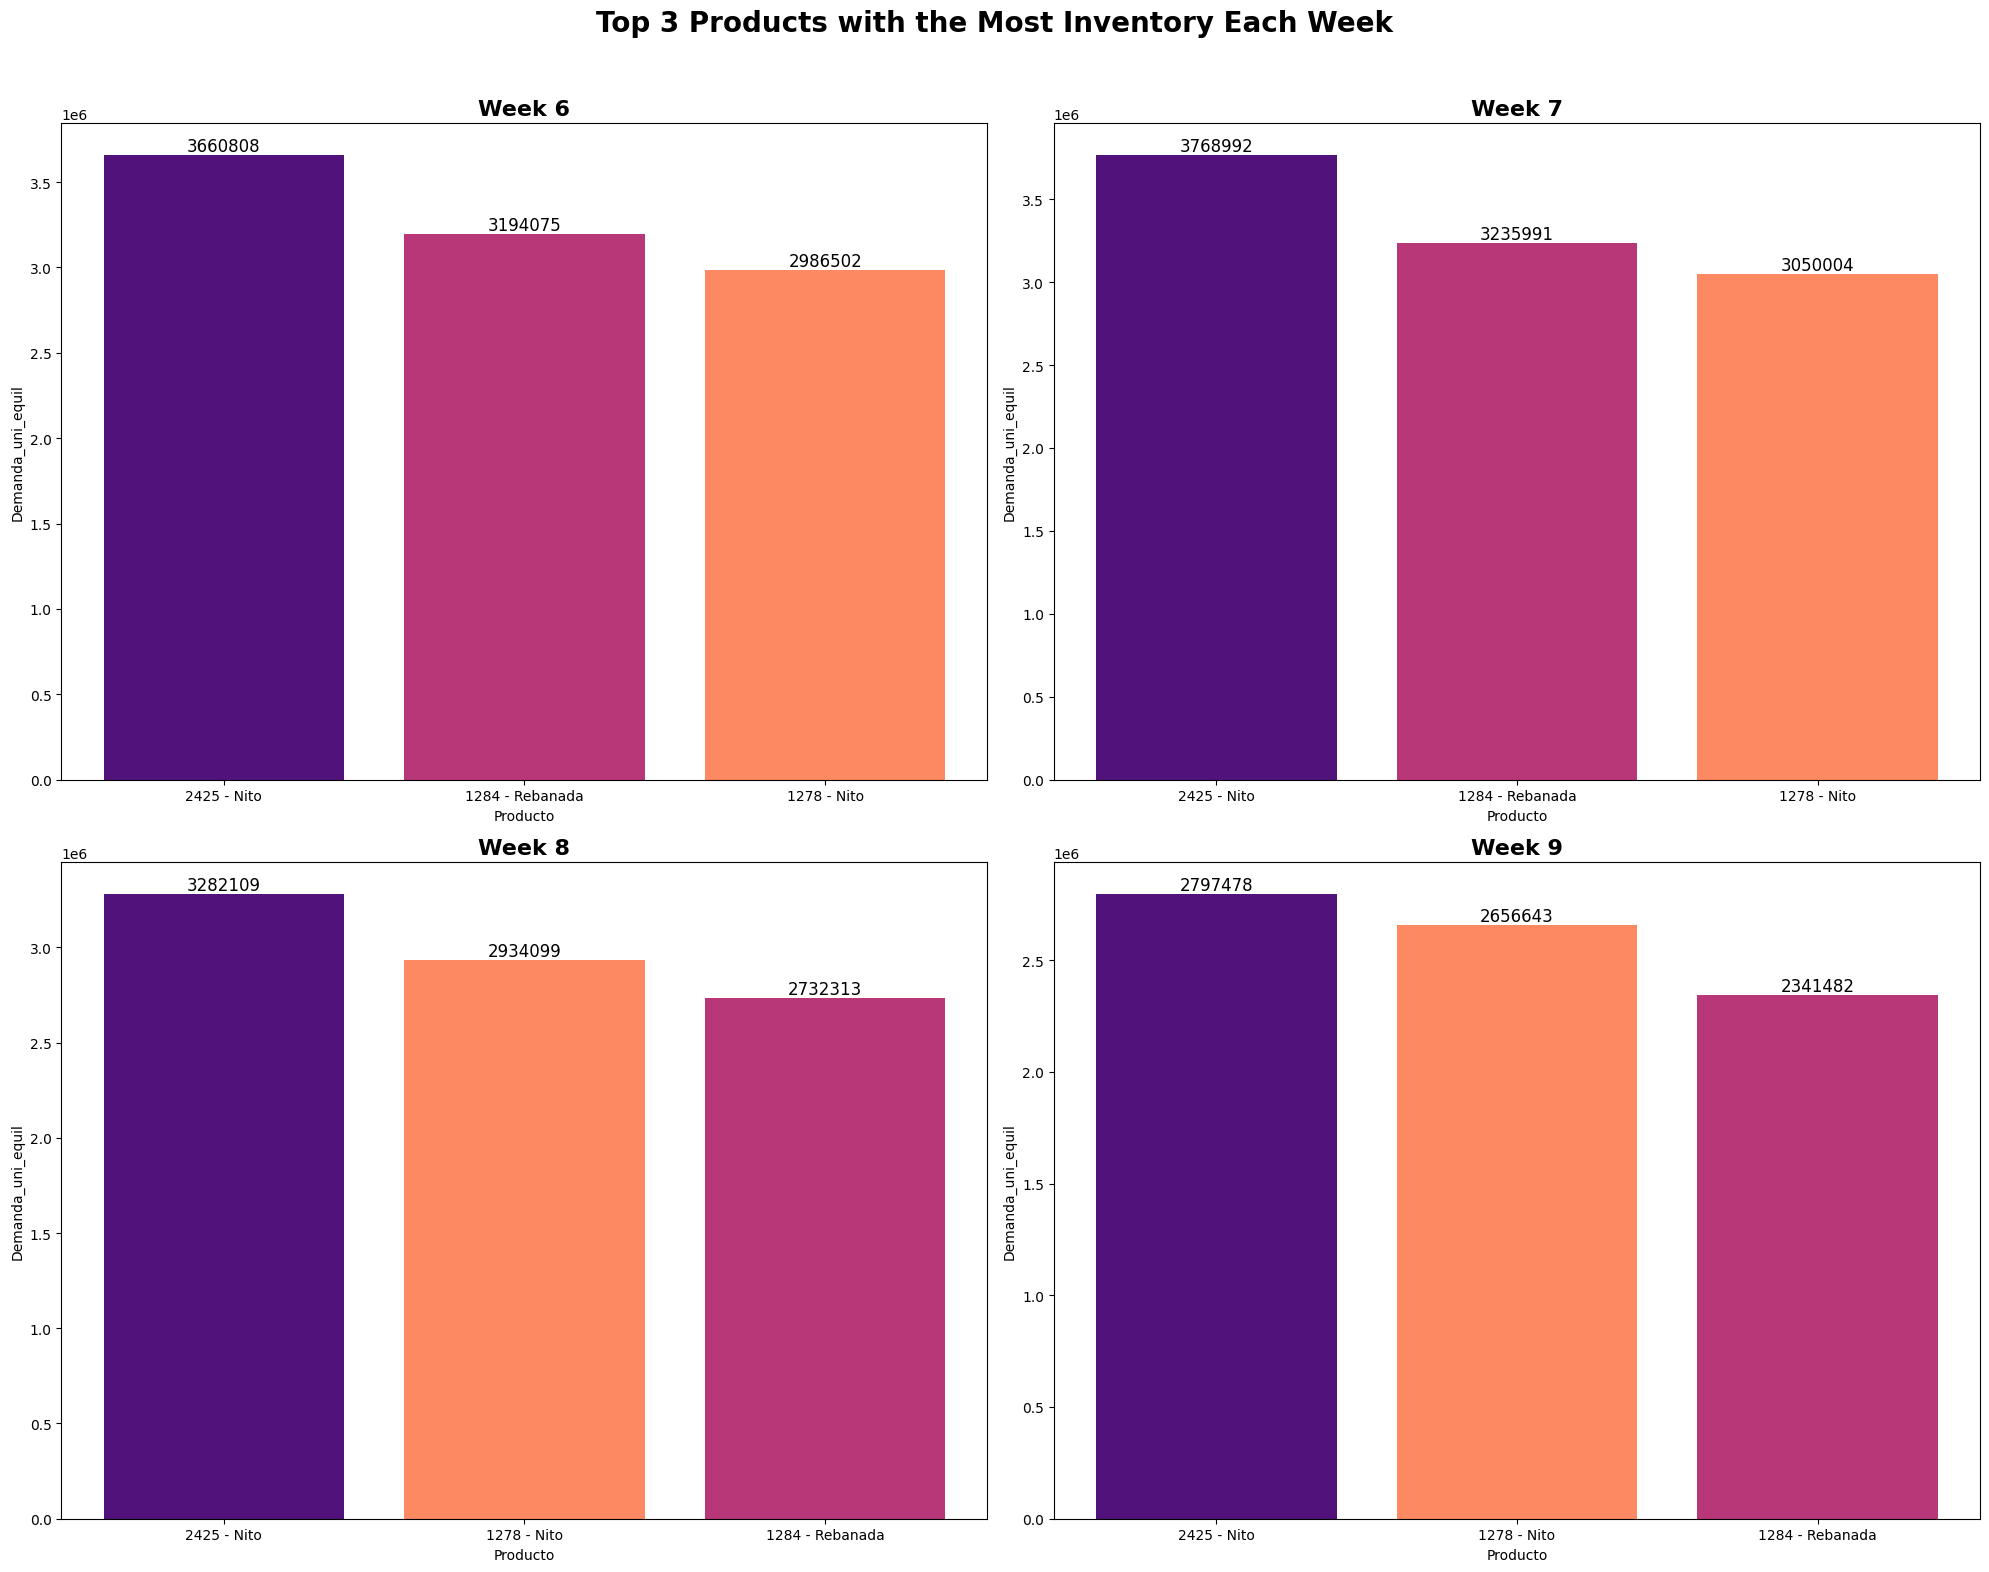

In [ ]:
# Create a figure with 2 columns and 2 rows
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Top 3 Products with the Most Inventory Each Week', fontsize=20, fontweight='bold')

# Store all products and their inventory quantities
all_products = []
for semana in [6, 7, 8, 9]:
    week_data = eda_df[eda_df['Semana'] == semana]
    top_products = week_data.groupby('Producto')['Demanda_uni_equil'].sum().nlargest(3).reset_index()
    all_products.append(top_products)

# Combine all product data into a single DataFrame
all_products_df = pd.concat(all_products)

# Get all unique products
unique_products = all_products_df['Producto'].unique()

# Generate a color palette from magma for the number of products
magma_colors = sns.color_palette('magma', len(unique_products))

# Create a dictionary mapping products to colors
product_colors = dict(zip(unique_products, magma_colors))

# Plot the data for each week with distinct colors for each product
for i, semana in enumerate([6, 7, 8, 9]):
    week_data = eda_df[eda_df['Semana'] == semana]
    top_products = week_data.groupby('Producto')['Demanda_uni_equil'].sum().nlargest(3).reset_index()
    ax = axes[i // 2, i % 2]
    bars = ax.bar(top_products['Producto'], top_products['Demanda_uni_equil'],
                  color=[product_colors[producto] for producto in top_products['Producto']])
    ax.set_title(f'Week {semana}', fontsize=16, fontweight='bold')
    ax.set_xlabel('Producto')
    ax.set_ylabel('Demanda_uni_equil')
    ax.set_xticklabels(top_products['Producto'], rotation=0, ha='center')

    # Add data labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Top 3 Products with the Most Return Each Week

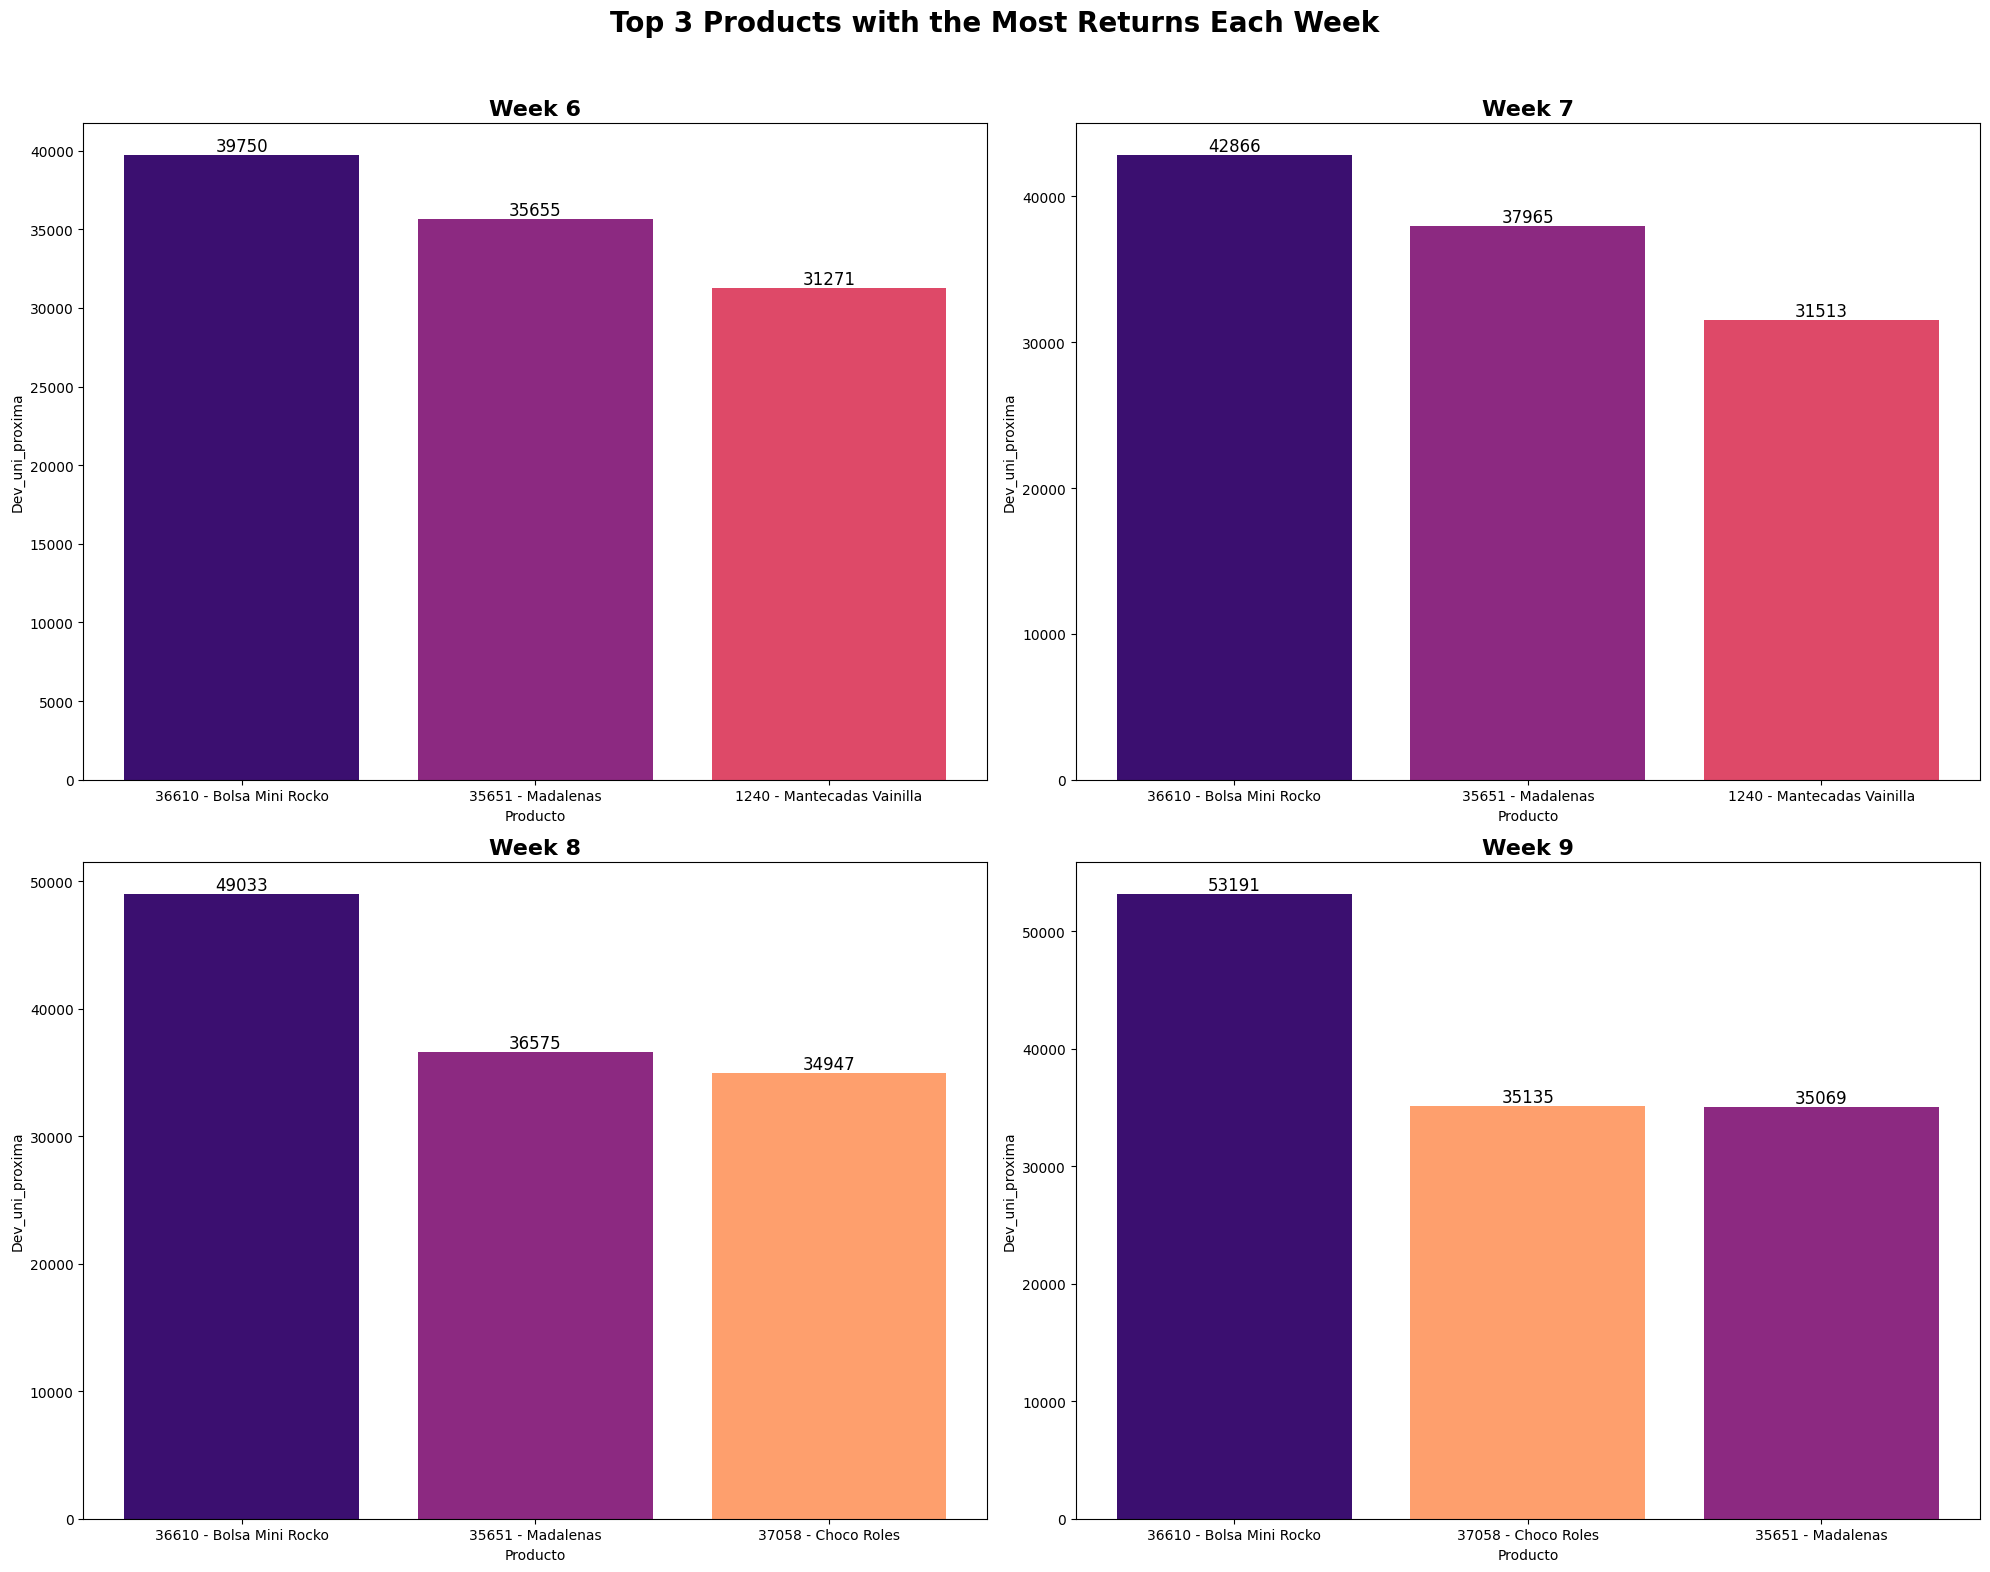

In [ ]:
# Create a figure with 2 columns and 2 rows
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Top 3 Products with the Most Returns Each Week', fontsize=20, fontweight='bold')

# Store all products and their returns
all_products = []
for semana in [6, 7, 8, 9]:
    week_data = eda_df[eda_df['Semana'] == semana]
    top_products = week_data.groupby('Producto')['Dev_uni_proxima'].sum().nlargest(3).reset_index()
    all_products.append(top_products)

# Combine all product data into a single DataFrame
all_products_df = pd.concat(all_products)

# Get all unique products
unique_products = all_products_df['Producto'].unique()

# Generate a color palette from magma for the number of products
magma_colors = sns.color_palette('magma', len(unique_products))

# Create a dictionary mapping products to colors
product_colors = dict(zip(unique_products, magma_colors))

# Plot the data for each week with distinct colors for each product
for i, semana in enumerate([6, 7, 8, 9]):
    week_data = eda_df[eda_df['Semana'] == semana]
    top_products = week_data.groupby('Producto')['Dev_uni_proxima'].sum().nlargest(3).reset_index()

    # Plot the bar chart
    ax = axes[i // 2, i % 2]
    bars = ax.bar(top_products['Producto'], top_products['Dev_uni_proxima'],
                  color=[product_colors[producto] for producto in top_products['Producto']])
    ax.set_title(f'Week {semana}', fontweight='bold', fontsize = 16)
    ax.set_xlabel('Producto')
    ax.set_ylabel('Dev_uni_proxima')
    ax.set_xticklabels(top_products['Producto'], rotation=0, ha='center')

    # Add data labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Model

## Define evaluation RMLSE

In [ ]:
def rmlse(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

## XGBoost

### Split data into train and test sets

In [ ]:
data_df = data_df.reset_index(drop=True)

X_train_6_xgb = data_df[data_df['Semana'] == 6].drop(columns=['Demanda_uni_equil'])
y_train_6_xgb = data_df[data_df['Semana'] == 6][['Demanda_uni_equil']]
X_test_7_xgb= data_df[data_df['Semana'] == 7].drop(columns=['Demanda_uni_equil'])
y_test_7_xgb = data_df[data_df['Semana'] == 7][['Demanda_uni_equil']]

X_train_67_xgb = data_df[data_df['Semana'].isin([6, 7])].drop(columns=['Demanda_uni_equil'])
y_train_67_xgb = data_df[data_df['Semana'].isin([6, 7])][['Demanda_uni_equil']]
X_test_8_xgb = data_df[data_df['Semana'] == 8].drop(columns=['Demanda_uni_equil'])
y_test_8_xgb = data_df[data_df['Semana'] == 8][['Demanda_uni_equil']]

X_train_678_xgb = data_df[data_df['Semana'].isin([6, 7, 8])].drop(columns=['Demanda_uni_equil'])
y_train_678_xgb = data_df[data_df['Semana'].isin([6, 7, 8])][['Demanda_uni_equil']]
X_test_9_xgb = data_df[data_df['Semana'] == 9].drop(columns=['Demanda_uni_equil'])
y_test_9_xgb = data_df[data_df['Semana'] == 9][['Demanda_uni_equil']]

### Train model (week 6) and Predict (week 7)

In [ ]:
# Log transformation of Demanda_uni_equil
y_train_6_xgb['Demanda_uni_equil'] = np.log1p(y_train_6_xgb['Demanda_uni_equil'])
y_test_7_xgb['Demanda_uni_equil'] = np.log1p(y_test_7_xgb['Demanda_uni_equil'])

# Set model parameters
params_xgb = {
    'objective': 'reg:linear',
    'n_estimators': 150,
    'booster': 'gbtree',
    'eta': 0.1,
    'max_depth': 10,
    'subsample': 0.85,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse'
}
model_xgb = xgb.XGBRegressor(**params_xgb)

# Train model
model_xgb.fit(X_train_6_xgb, y_train_6_xgb,
              eval_set = [(X_train_6_xgb,y_train_6_xgb), (X_test_7_xgb, y_test_7_xgb)],
              early_stopping_rounds = 5)

# Predict y_validation set
preds_test_7_xgb = np.expm1(model_xgb.predict(X_test_7_xgb))
y_test_7_xgb = np.expm1(y_test_7_xgb)

[0]	validation_0-rmse:1.74551	validation_1-rmse:1.75459
[1]	validation_0-rmse:1.57228	validation_1-rmse:1.58032
[2]	validation_0-rmse:1.41625	validation_1-rmse:1.42350
[3]	validation_0-rmse:1.28936	validation_1-rmse:1.30190
[4]	validation_0-rmse:1.17261	validation_1-rmse:1.19035
[5]	validation_0-rmse:1.05679	validation_1-rmse:1.07404
[6]	validation_0-rmse:0.96320	validation_1-rmse:0.98591
[7]	validation_0-rmse:0.87931	validation_1-rmse:0.90730
[8]	validation_0-rmse:0.80478	validation_1-rmse:0.83859
[9]	validation_0-rmse:0.72661	validation_1-rmse:0.76066
[10]	validation_0-rmse:0.65610	validation_1-rmse:0.69032
[11]	validation_0-rmse:0.59264	validation_1-rmse:0.62718
[12]	validation_0-rmse:0.53575	validation_1-rmse:0.57029
[13]	validation_0-rmse:0.48432	validation_1-rmse:0.51943
[14]	validation_0-rmse:0.44614	validation_1-rmse:0.48550
[15]	validation_0-rmse:0.40431	validation_1-rmse:0.44413
[16]	validation_0-rmse:0.37410	validation_1-rmse:0.41827
[17]	validation_0-rmse:0.34685	validation

### Evaluate (week 7)

In [ ]:
print('The rmlse of prediction is:', round(rmlse(y_test_7_xgb, preds_test_7_xgb), 5))
print('The mae of prediction is:', round(mean_absolute_error(y_test_7_xgb, preds_test_7_xgb), 5))
print('The R² of prediction is:', round(r2_score(y_test_7_xgb, preds_test_7_xgb), 5))

The rmlse of prediction is: 0.13097
The mae of prediction is: 54.58637
The R² of prediction is: 0.9812


### Train model (week 6, 7) and Predict (week 8)

In [ ]:
# Log transformation of Demanda_uni_equil
y_train_67_xgb['Demanda_uni_equil'] = np.log1p(y_train_67_xgb['Demanda_uni_equil'])
y_test_8_xgb['Demanda_uni_equil'] = np.log1p(y_test_8_xgb['Demanda_uni_equil'])

# Set model parameters
params_xgb = {
    'objective': 'reg:linear',
    'n_estimators': 150,
    'booster': 'gbtree',
    'eta': 0.1,
    'max_depth': 10,
    'subsample': 0.85,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse'  # Specify the evaluation metric here
}
model_xgb = xgb.XGBRegressor(**params_xgb)

# Train model
model_xgb.fit(X_train_67_xgb, y_train_67_xgb,
              eval_set = [(X_train_67_xgb,y_train_67_xgb), (X_test_8_xgb, y_test_8_xgb)],
              early_stopping_rounds = 5)

# Predict y_validation set
preds_test_8_xgb = np.expm1(model_xgb.predict(X_test_8_xgb))
y_test_8_xgb = np.expm1(y_test_8_xgb)

[0]	validation_0-rmse:1.74982	validation_1-rmse:1.76954
[1]	validation_0-rmse:1.57589	validation_1-rmse:1.59358
[2]	validation_0-rmse:1.41924	validation_1-rmse:1.43530
[3]	validation_0-rmse:1.29280	validation_1-rmse:1.31204
[4]	validation_0-rmse:1.17676	validation_1-rmse:1.19775
[5]	validation_0-rmse:1.06037	validation_1-rmse:1.08025
[6]	validation_0-rmse:0.96762	validation_1-rmse:0.98981
[7]	validation_0-rmse:0.88450	validation_1-rmse:0.90919
[8]	validation_0-rmse:0.81074	validation_1-rmse:0.83771
[9]	validation_0-rmse:0.73189	validation_1-rmse:0.75832
[10]	validation_0-rmse:0.66078	validation_1-rmse:0.68671
[11]	validation_0-rmse:0.59675	validation_1-rmse:0.62245
[12]	validation_0-rmse:0.53948	validation_1-rmse:0.56497
[13]	validation_0-rmse:0.48768	validation_1-rmse:0.51322
[14]	validation_0-rmse:0.45011	validation_1-rmse:0.47827
[15]	validation_0-rmse:0.40794	validation_1-rmse:0.43653
[16]	validation_0-rmse:0.37850	validation_1-rmse:0.40955
[17]	validation_0-rmse:0.35204	validation

### Evaluate (week 8)

In [ ]:
print('The rmlse of prediction is:', round(rmlse(y_test_8_xgb, preds_test_8_xgb), 5))
print('The mae of prediction is:', round(mean_absolute_error(y_test_8_xgb, preds_test_8_xgb), 5))
print('The R² of prediction is:', round(r2_score(y_test_8_xgb, preds_test_8_xgb), 5))

The rmlse of prediction is: 0.12326
The mae of prediction is: 48.99113
The R² of prediction is: 0.98593


### Train model (week 6, 7, 8) and Predict (week 9)

In [ ]:
# Log transformation of Demanda_uni_equil
y_train_678_xgb['Demanda_uni_equil'] = np.log1p(y_train_678_xgb['Demanda_uni_equil'])
y_test_9_xgb['Demanda_uni_equil'] = np.log1p(y_test_9_xgb['Demanda_uni_equil'])

# Set model parameters
params_xgb = {
    'objective': 'reg:linear',
    'n_estimators': 150,
    'booster': 'gbtree',
    'eta': 0.1,
    'max_depth': 10,
    'subsample': 0.85,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse'  # Specify the evaluation metric here
}
model_xgb = xgb.XGBRegressor(**params_xgb)

# Train model
model_xgb.fit(X_train_678_xgb, y_train_678_xgb,
              eval_set = [(X_train_678_xgb, y_train_678_xgb), (X_test_9_xgb, y_test_9_xgb)],
              early_stopping_rounds = 5)

# Predict y_validation set
preds_test_9_xgb = np.expm1(model_xgb.predict(X_test_9_xgb))
y_test_9_xgb = np.expm1(y_test_9_xgb)

[0]	validation_0-rmse:1.75622	validation_1-rmse:1.78723
[1]	validation_0-rmse:1.58154	validation_1-rmse:1.60934
[2]	validation_0-rmse:1.42425	validation_1-rmse:1.44925
[3]	validation_0-rmse:1.29817	validation_1-rmse:1.32605
[4]	validation_0-rmse:1.18156	validation_1-rmse:1.21005
[5]	validation_0-rmse:1.06463	validation_1-rmse:1.09106
[6]	validation_0-rmse:0.97166	validation_1-rmse:0.99924
[7]	validation_0-rmse:0.88838	validation_1-rmse:0.91673
[8]	validation_0-rmse:0.81450	validation_1-rmse:0.84387
[9]	validation_0-rmse:0.73528	validation_1-rmse:0.76310
[10]	validation_0-rmse:0.66379	validation_1-rmse:0.69029
[11]	validation_0-rmse:0.59946	validation_1-rmse:0.62516
[12]	validation_0-rmse:0.54194	validation_1-rmse:0.56672
[13]	validation_0-rmse:0.48988	validation_1-rmse:0.51403
[14]	validation_0-rmse:0.45247	validation_1-rmse:0.47757
[15]	validation_0-rmse:0.41010	validation_1-rmse:0.43474
[16]	validation_0-rmse:0.38069	validation_1-rmse:0.40661
[17]	validation_0-rmse:0.35444	validation

### Evaluate (week 9)

In [ ]:
print('The rmlse of prediction is:', round(rmlse(y_test_9_xgb, preds_test_9_xgb), 5))
print('The mae of prediction is:', round(mean_absolute_error(y_test_9_xgb, preds_test_9_xgb), 5))
print('The R² of prediction is:', round(r2_score(y_test_9_xgb, preds_test_9_xgb), 5))

The rmlse of prediction is: 0.10943
The mae of prediction is: 50.57126
The R² of prediction is: 0.9821


## LightGBM

### Split data into train and test sets

In [ ]:
data_df = data_df.reset_index(drop=True)

X_train_6_lgb = data_df[data_df['Semana'] == 6].drop(columns=['Demanda_uni_equil'])
y_train_6_lgb = data_df[data_df['Semana'] == 6][['Demanda_uni_equil']]
X_test_7_lgb = data_df[data_df['Semana'] == 7].drop(columns=['Demanda_uni_equil'])
y_test_7_lgb = data_df[data_df['Semana'] == 7][['Demanda_uni_equil']]

X_train_67_lgb = data_df[data_df['Semana'].isin([6, 7])].drop(columns=['Demanda_uni_equil'])
y_train_67_lgb = data_df[data_df['Semana'].isin([6, 7])][['Demanda_uni_equil']]
X_test_8_lgb = data_df[data_df['Semana'] == 8].drop(columns=['Demanda_uni_equil'])
y_test_8_lgb = data_df[data_df['Semana'] == 8][['Demanda_uni_equil']]

X_train_678_lgb = data_df[data_df['Semana'].isin([6, 7, 8])].drop(columns=['Demanda_uni_equil'])
y_train_678_lgb = data_df[data_df['Semana'].isin([6, 7, 8])][['Demanda_uni_equil']]
X_test_9_lgb = data_df[data_df['Semana'] == 9].drop(columns=['Demanda_uni_equil'])
y_test_9_lgb = data_df[data_df['Semana'] == 9][['Demanda_uni_equil']]

### Train model (week 6) and Predict (week 7)

In [ ]:
# Log transformation of Demanda_uni_equil
y_train_6_lgb['Demanda_uni_equil'] = np.log1p(y_train_6_lgb['Demanda_uni_equil'])
y_test_7_lgb['Demanda_uni_equil'] = np.log1p(y_test_7_lgb['Demanda_uni_equil'])

# Set parameters
params_lgb = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'max_depth': -1,
    'subsample': 0.85,
    'colsample_bytree': 0.8,
    'metric': 'rmse',
    'min_child_samples':20,
    'min_child_weight':0.001,
    'min_split_gain':0.0,
    'n_estimators' :150
}
model_lgb = lgb.LGBMRegressor(**params_lgb)

# Train model
model_lgb.fit(X_train_6_lgb, y_train_6_lgb,
              eval_set = [(X_train_6_lgb, y_train_6_lgb), (X_test_7_lgb, y_test_7_lgb)],
              callbacks=[lgb.early_stopping(stopping_rounds=5)],
              eval_metric= 'rmse')

# Predict y_validation set
preds_test_7_lgb = np.expm1(model_lgb.predict(X_test_7_lgb))
y_test_7_lgb = np.expm1(y_test_7_lgb)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2139
[LightGBM] [Info] Number of data points in the train set: 61402, number of used features: 9
[LightGBM] [Info] Start training from score 5.479518
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[148]	training's rmse: 0.065523	valid_1's rmse: 0.10151


### Evaluate (week 7)

In [ ]:
print('The rmlse of prediction is:', round(rmlse(y_test_7_lgb, preds_test_7_lgb), 5))
print('The mae of prediction is:', round(mean_absolute_error(y_test_7_lgb, preds_test_7_lgb), 5))
print('The R² of prediction is:', round(r2_score(y_test_7_lgb, preds_test_7_lgb), 5))

The rmlse of prediction is: 0.10151
The mae of prediction is: 58.76194
The R² of prediction is: 0.95659


### Train model (week 6, 7) and Predict (week 8)

In [ ]:
# Log transformation of Demanda_uni_equil
y_train_67_lgb['Demanda_uni_equil'] = np.log1p(y_train_67_lgb['Demanda_uni_equil'])
y_test_8_lgb['Demanda_uni_equil'] = np.log1p(y_test_8_lgb['Demanda_uni_equil'])

# Set parameters
params_lgb = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'max_depth': -1,
    'subsample': 0.85,
    'colsample_bytree': 0.8,
    'metric': 'rmse',
    'min_child_samples':20,
    'min_child_weight':0.001,
    'min_split_gain':0.0,
    'n_estimators' :150
}
model_lgb = lgb.LGBMRegressor(**params_lgb)

# Train model
model_lgb.fit(X_train_67_lgb, y_train_67_lgb,
              eval_set = [(X_train_67_lgb, y_train_67_lgb), (X_test_8_lgb, y_test_8_lgb)],
              callbacks=[lgb.early_stopping(stopping_rounds=5)],
              eval_metric= 'rmse')

# Predict y_validation set
preds_test_8_lgb = np.expm1(model_lgb.predict(X_test_8_lgb))
y_test_8_lgb = np.expm1(y_test_8_lgb)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030974 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 122587, number of used features: 10
[LightGBM] [Info] Start training from score 5.467148
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[150]	training's rmse: 0.0769178	valid_1's rmse: 0.10207


### Evaluate (week 8)

In [ ]:
print('The rmlse of prediction is:', round(rmlse(y_test_8_lgb, preds_test_8_lgb), 5))
print('The mae of prediction is:', round(mean_absolute_error(y_test_8_lgb, preds_test_8_lgb), 5))
print('The R² of prediction is:', round(r2_score(y_test_8_lgb, preds_test_8_lgb), 5))

The rmlse of prediction is: 0.10207
The mae of prediction is: 54.61324
The R² of prediction is: 0.97824


### Train model (week 6, 7, 8) and Predict (week 9)

In [ ]:
# Log transformation of Demanda_uni_equil
y_train_678_lgb['Demanda_uni_equil'] = np.log1p(y_train_678_lgb['Demanda_uni_equil'])
y_test_9_lgb['Demanda_uni_equil'] = np.log1p(y_test_9_lgb['Demanda_uni_equil'])

# Set parameters
params_lgb = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'max_depth': -1,
    'subsample': 0.85,
    'colsample_bytree': 0.8,
    'metric': 'rmse',
    'min_child_samples':20,
    'min_child_weight':0.001,
    'min_split_gain':0.0,
    'n_estimators' :150
}
model_lgb = lgb.LGBMRegressor(**params_lgb)

# Train model
model_lgb.fit(X_train_678_lgb, y_train_678_lgb,
              eval_set = [(X_train_678_lgb, y_train_678_lgb), (X_test_9_lgb, y_test_9_lgb)],
              callbacks=[lgb.early_stopping(stopping_rounds=5)],
              eval_metric= 'rmse')

# Predict y_validation set
preds_test_9_lgb = np.expm1(model_lgb.predict(X_test_9_lgb))
y_test_9_lgb = np.expm1(y_test_9_lgb)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2157
[LightGBM] [Info] Number of data points in the train set: 183186, number of used features: 10
[LightGBM] [Info] Start training from score 5.449222
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[150]	training's rmse: 0.0801214	valid_1's rmse: 0.0995407


### Evaluate (week 9)

In [ ]:
print('The rmlse of prediction is:', round(rmlse(y_test_9_lgb, preds_test_9_lgb), 5))
print('The mae of prediction is:', round(mean_absolute_error(y_test_9_lgb, preds_test_9_lgb), 5))
print('The R² of prediction is:', round(r2_score(y_test_9_lgb, preds_test_9_lgb), 5))

The rmlse of prediction is: 0.09954
The mae of prediction is: 53.55948
The R² of prediction is: 0.97639


# Result #

## XGBoost ##

### Predictive result

In [ ]:
preds_test_9_xgb_int = np.round(preds_test_9_xgb).astype(int)
y_test_9_xgb_int = np.round(y_test_9_xgb).astype(int)
result_xgb = pd.DataFrame({
    'Semana': X_test_9_xgb['Semana'],
    'Agencia_ID': X_test_9_xgb['Agencia_ID'],
    'Producto_ID': X_test_9_xgb['Producto_ID'],
    'Actual Demand': y_test_9_xgb_int.values.ravel(),
    'Predicted Demand': preds_test_9_xgb_int.ravel()
})
result_xgb = result_xgb.merge(product_df[['Producto_ID', 'Popular_Name']], on='Producto_ID', how='left')
result_xgb = result_xgb.merge(town_state_df[['Agencia_ID', 'Town_name']], on='Agencia_ID', how='left')

In [ ]:
# Get the first 20 rows
result_subset_xgb = result_xgb[['Semana', 'Agencia_ID', 'Town_name', 'Producto_ID', 'Popular_Name', 'Actual Demand', 'Predicted Demand']].head(20)
print(tabulate(result_subset_xgb, headers='keys', tablefmt='fancy_grid', showindex=False))

╒══════════╤══════════════╤═══════════════╤═══════════════╤══════════════════════════╤═════════════════╤════════════════════╕
│   Semana │   Agencia_ID │ Town_name     │   Producto_ID │ Popular_Name             │   Actual Demand │   Predicted Demand │
╞══════════╪══════════════╪═══════════════╪═══════════════╪══════════════════════════╪═════════════════╪════════════════════╡
│        9 │         1110 │ AG. LAGO FILT │            73 │ Pan Multigrano Linaza    │              36 │                 37 │
├──────────┼──────────────┼───────────────┼───────────────┼──────────────────────────┼─────────────────┼────────────────────┤
│        9 │         1110 │ AG. LAGO FILT │           108 │ Baguette Precocida Cong  │             688 │                629 │
├──────────┼──────────────┼───────────────┼───────────────┼──────────────────────────┼─────────────────┼────────────────────┤
│        9 │         1110 │ AG. LAGO FILT │           145 │ Super Hot Dogs           │             685 │              

### Evaluation result

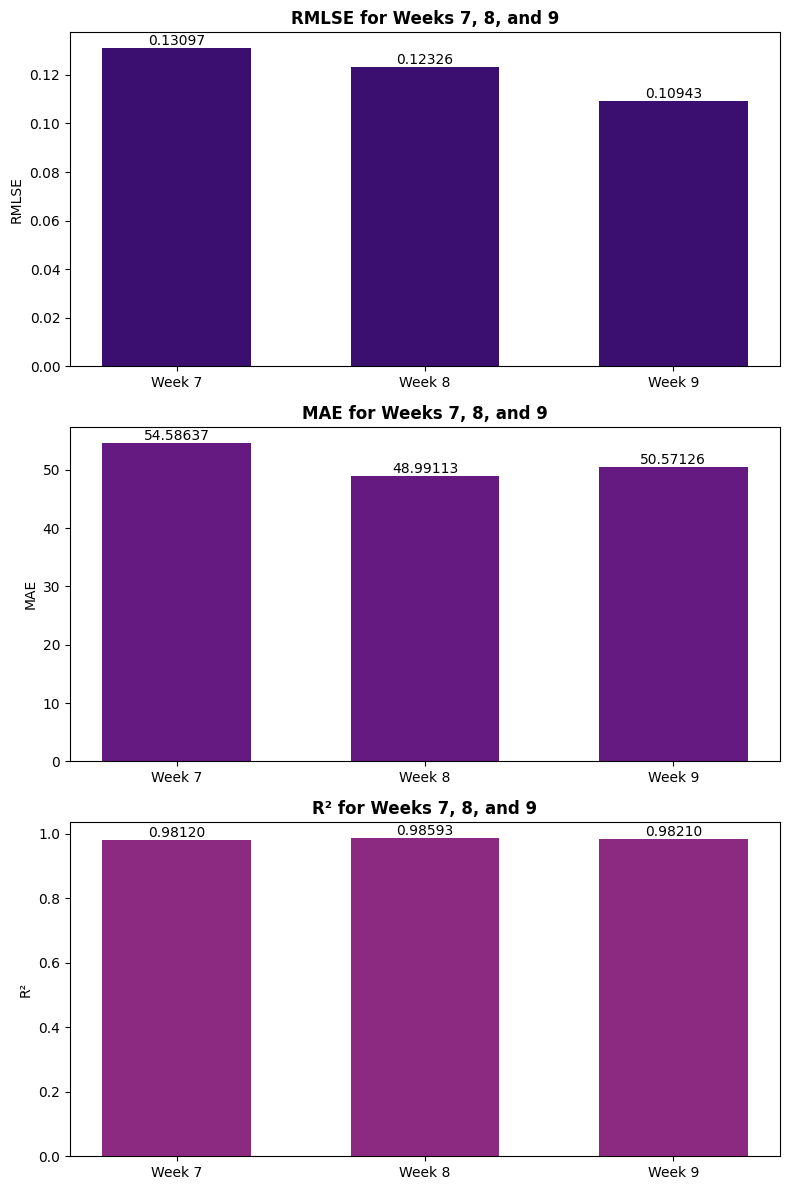

In [ ]:
weeks = ['Week 7', 'Week 8', 'Week 9']

# Evaluation of XGBoost
rmlse_values_xgb = [
    round(rmlse(y_test_7_xgb, preds_test_7_xgb), 5),
    round(rmlse(y_test_8_xgb, preds_test_8_xgb), 5),
    round(rmlse(y_test_9_xgb, preds_test_9_xgb), 5)
]

mae_values_xgb = [
    round(mean_absolute_error(y_test_7_xgb, preds_test_7_xgb), 5),
    round(mean_absolute_error(y_test_8_xgb, preds_test_8_xgb), 5),
    round(mean_absolute_error(y_test_9_xgb, preds_test_9_xgb), 5)
]

r2_values_xgb = [
    round(r2_score(y_test_7_xgb, preds_test_7_xgb), 5),
    round(r2_score(y_test_8_xgb, preds_test_8_xgb), 5),
    round(r2_score(y_test_9_xgb, preds_test_9_xgb), 5)
]


fig, axes = plt.subplots(3, 1, figsize=(8, 12))
width = 0.6
x = np.arange(len(weeks))

# Set colors
colors_rmlse = plt.cm.magma(0.2)
colors_mae = plt.cm.magma(0.3)
colors_r2 = plt.cm.magma(0.4)

# Plot bar plot for  RMLSE
bars_rmlse = axes[0].bar(x, rmlse_values_xgb, width, label='XGBoost', color=colors_rmlse)
axes[0].set_title('RMLSE for Weeks 7, 8, and 9', fontweight='bold')
axes[0].set_ylabel('RMLSE')
axes[0].set_xticks(x)
axes[0].set_xticklabels(weeks)

# Add values for RMLSE
for bar in bars_rmlse:
    yval = round(bar.get_height(), 5)
    axes[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.5f}', ha='center', va='bottom')

# Plot bar plot for MAE
bars_mae = axes[1].bar(x, mae_values_xgb, width, label='XGBoost', color=colors_mae)
axes[1].set_title('MAE for Weeks 7, 8, and 9', fontweight='bold')
axes[1].set_ylabel('MAE')
axes[1].set_xticks(x)
axes[1].set_xticklabels(weeks)

# Add values for MAE
for bar in bars_mae:
    yval = round(bar.get_height(), 5)
    axes[1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.5f}', ha='center', va='bottom')

# Plot bar plot for R²
bars_r2 = axes[2].bar(x, r2_values_xgb, width, label='XGBoost', color=colors_r2)
axes[2].set_title('R² for Weeks 7, 8, and 9', fontweight='bold')
axes[2].set_ylabel('R²')
axes[2].set_xticks(x)
axes[2].set_xticklabels(weeks)

# Add values for R²
for bar in bars_r2:
    yval = round(bar.get_height(), 5)
    axes[2].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.5f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## LightGBM ##

### Predictive result

In [ ]:
preds_test_9_lgb_int = np.round(preds_test_9_lgb).astype(int)
y_test_9_lgb_int = np.round(y_test_9_lgb).astype(int)
result_lgb = pd.DataFrame({
    'Semana': X_test_9_lgb['Semana'],
    'Agencia_ID': X_test_9_lgb['Agencia_ID'],
    'Producto_ID': X_test_9_lgb['Producto_ID'],
    'Actual Demand': y_test_9_lgb_int.values.ravel(),
    'Predicted Demand': preds_test_9_lgb_int.ravel()
})
result_lgb = result_lgb.merge(product_df[['Producto_ID', 'Popular_Name']], on='Producto_ID', how='left')
result_lgb = result_lgb.merge(town_state_df[['Agencia_ID', 'Town_name']], on='Agencia_ID', how='left')

In [ ]:
# Get the first 20 rows
result_subset_lgb = result_lgb[['Semana', 'Agencia_ID', 'Town_name', 'Producto_ID', 'Popular_Name', 'Actual Demand', 'Predicted Demand']].head(20)
print(tabulate(result_subset_lgb, headers='keys', tablefmt='fancy_grid', showindex=False))

╒══════════╤══════════════╤═══════════════╤═══════════════╤══════════════════════════╤═════════════════╤════════════════════╕
│   Semana │   Agencia_ID │ Town_name     │   Producto_ID │ Popular_Name             │   Actual Demand │   Predicted Demand │
╞══════════╪══════════════╪═══════════════╪═══════════════╪══════════════════════════╪═════════════════╪════════════════════╡
│        9 │         1110 │ AG. LAGO FILT │            73 │ Pan Multigrano Linaza    │              36 │                 37 │
├──────────┼──────────────┼───────────────┼───────────────┼──────────────────────────┼─────────────────┼────────────────────┤
│        9 │         1110 │ AG. LAGO FILT │           108 │ Baguette Precocida Cong  │             688 │                670 │
├──────────┼──────────────┼───────────────┼───────────────┼──────────────────────────┼─────────────────┼────────────────────┤
│        9 │         1110 │ AG. LAGO FILT │           145 │ Super Hot Dogs           │             685 │              

### Evaluation result

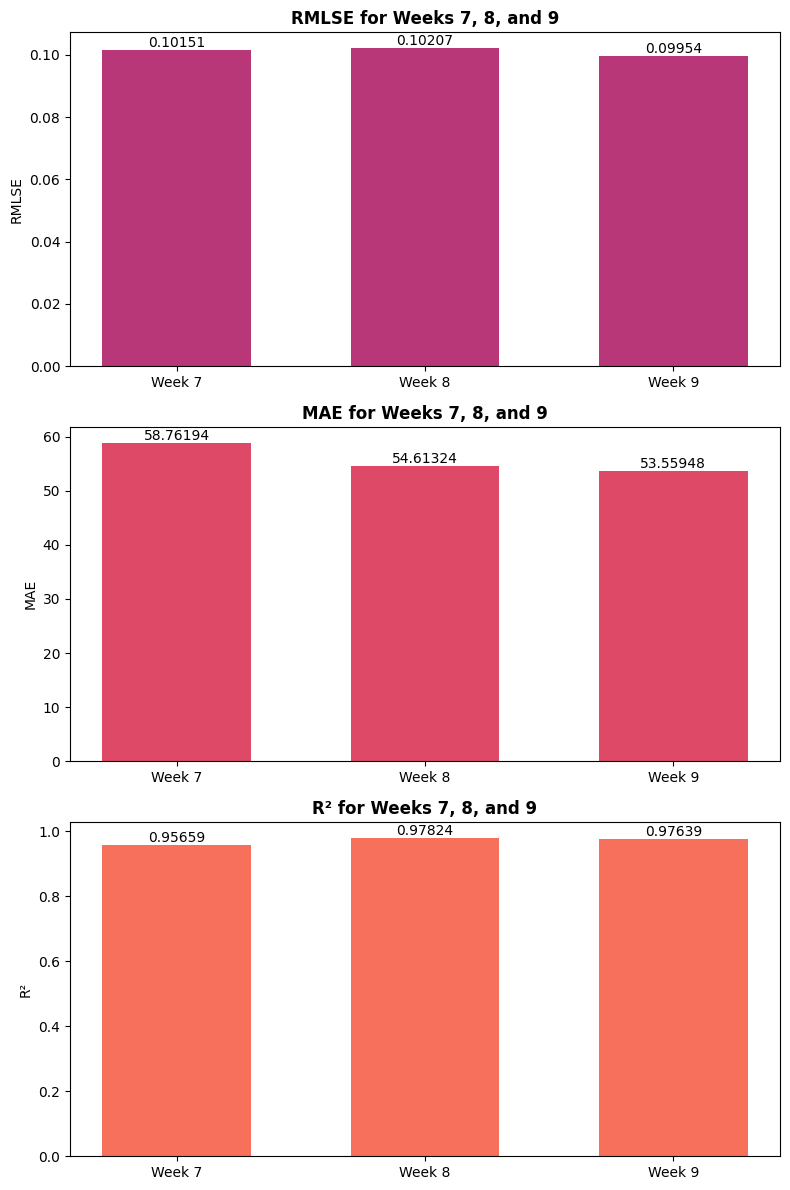

In [ ]:
weeks = ['Week 7', 'Week 8', 'Week 9']

# Evaluation of LightGBM
rmlse_values_lgb = [
    round(rmlse(y_test_7_lgb, preds_test_7_lgb), 5),
    round(rmlse(y_test_8_lgb, preds_test_8_lgb), 5),
    round(rmlse(y_test_9_lgb, preds_test_9_lgb), 5)
]

mae_values_lgb = [
    round(mean_absolute_error(y_test_7_lgb, preds_test_7_lgb), 5),
    round(mean_absolute_error(y_test_8_lgb, preds_test_8_lgb), 5),
    round(mean_absolute_error(y_test_9_lgb, preds_test_9_lgb), 5)
]

r2_values_lgb = [
    round(r2_score(y_test_7_lgb, preds_test_7_lgb), 5),
    round(r2_score(y_test_8_lgb, preds_test_8_lgb), 5),
    round(r2_score(y_test_9_lgb, preds_test_9_lgb), 5)
]


fig, axes = plt.subplots(3, 1, figsize=(8, 12))
width = 0.6
x = np.arange(len(weeks))

# Set colors
colors_rmlse = plt.cm.magma(0.5)
colors_mae = plt.cm.magma(0.6)
colors_r2 = plt.cm.magma(0.7)

# Plot bar plot for RMLSE
bars_rmlse = axes[0].bar(x, rmlse_values_lgb, width, label='LightGBM', color=colors_rmlse)
axes[0].set_title('RMLSE for Weeks 7, 8, and 9', fontweight='bold')
axes[0].set_ylabel('RMLSE')
axes[0].set_xticks(x)
axes[0].set_xticklabels(weeks)

# Add values for RMLSE
for bar in bars_rmlse:
    yval = round(bar.get_height(), 5)
    axes[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.5f}', ha='center', va='bottom')

# Plot bar plot for MAE
bars_mae = axes[1].bar(x, mae_values_lgb, width, label='LightGBM', color=colors_mae)
axes[1].set_title('MAE for Weeks 7, 8, and 9', fontweight='bold')
axes[1].set_ylabel('MAE')
axes[1].set_xticks(x)
axes[1].set_xticklabels(weeks)

# Add values for MAE
for bar in bars_mae:
    yval = round(bar.get_height(), 5)
    axes[1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.5f}', ha='center', va='bottom')

# Plot bar plot for R²
bars_r2 = axes[2].bar(x, r2_values_lgb, width, label='LightGBM', color=colors_r2)
axes[2].set_title('R² for Weeks 7, 8, and 9', fontweight='bold')
axes[2].set_ylabel('R²')
axes[2].set_xticks(x)
axes[2].set_xticklabels(weeks)

# Add values for R²
for bar in bars_r2:
    yval = round(bar.get_height(), 5)
    axes[2].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.5f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Compare 2 models

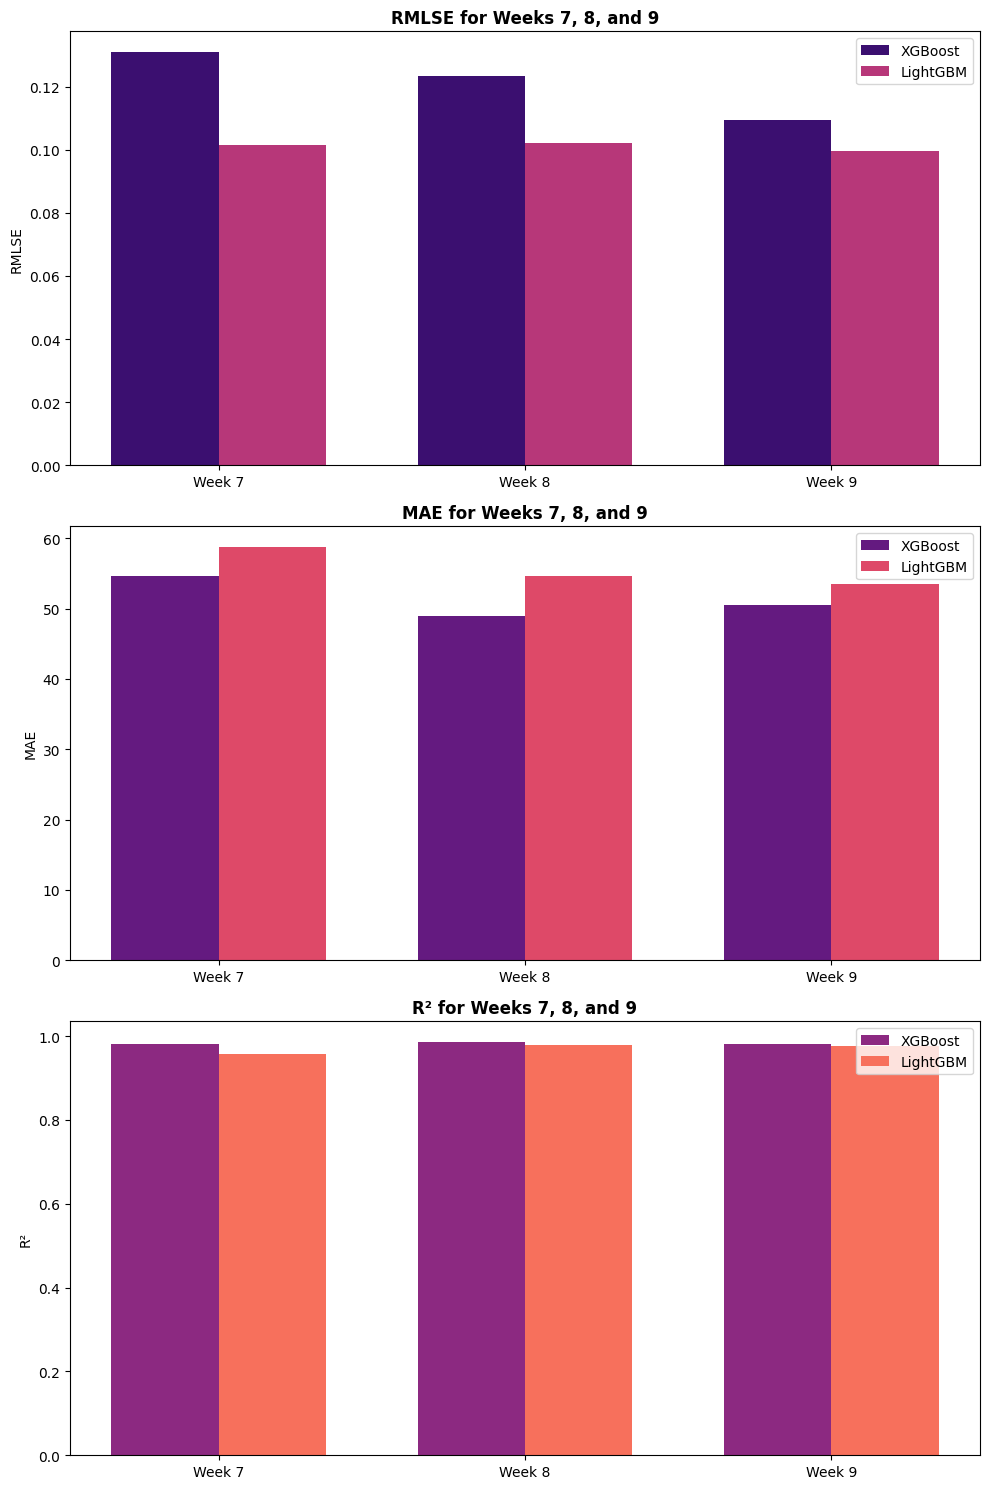

In [ ]:
weeks = ['Week 7', 'Week 8', 'Week 9']

# Evaluation of XGBoost
rmlse_values_xgb = [
    round(rmlse(y_test_7_xgb, preds_test_7_xgb), 5),
    round(rmlse(y_test_8_xgb, preds_test_8_xgb), 5),
    round(rmlse(y_test_9_xgb, preds_test_9_xgb), 5)
]

mae_values_xgb = [
    round(mean_absolute_error(y_test_7_xgb, preds_test_7_xgb), 5),
    round(mean_absolute_error(y_test_8_xgb, preds_test_8_xgb), 5),
    round(mean_absolute_error(y_test_9_xgb, preds_test_9_xgb), 5)
]

r2_values_xgb = [
    round(r2_score(y_test_7_xgb, preds_test_7_xgb), 5),
    round(r2_score(y_test_8_xgb, preds_test_8_xgb), 5),
    round(r2_score(y_test_9_xgb, preds_test_9_xgb), 5)
]

# Evaluation of LightGBM
rmlse_values_lgb = [
    round(rmlse(y_test_7_lgb, preds_test_7_lgb), 5),
    round(rmlse(y_test_8_lgb, preds_test_8_lgb), 5),
    round(rmlse(y_test_9_lgb, preds_test_9_lgb), 5)
]

mae_values_lgb = [
    round(mean_absolute_error(y_test_7_lgb, preds_test_7_lgb), 5),
    round(mean_absolute_error(y_test_8_lgb, preds_test_8_lgb), 5),
    round(mean_absolute_error(y_test_9_lgb, preds_test_9_lgb), 5)
]

r2_values_lgb = [
    round(r2_score(y_test_7_lgb, preds_test_7_lgb), 5),
    round(r2_score(y_test_8_lgb, preds_test_8_lgb), 5),
    round(r2_score(y_test_9_lgb, preds_test_9_lgb), 5)
]


fig, axes = plt.subplots(3, 1, figsize=(10, 15))
width = 0.35
x = np.arange(len(weeks))

# Set colors
colors_rmlse = plt.cm.magma(np.linspace(0.2, 0.5, 2))
colors_mae = plt.cm.magma(np.linspace(0.3, 0.6, 2))
colors_r2 = plt.cm.magma(np.linspace(0.4, 0.7, 2))

# Plot bar plot for RMLSE
axes[0].bar(x - width/2, rmlse_values_xgb, width, label='XGBoost', color=colors_rmlse[0])
axes[0].bar(x + width/2, rmlse_values_lgb, width, label='LightGBM', color=colors_rmlse[1])
axes[0].set_title('RMLSE for Weeks 7, 8, and 9', fontweight='bold')
axes[0].set_ylabel('RMLSE')
axes[0].set_xticks(x)
axes[0].set_xticklabels(weeks)
axes[0].legend()

# Plot bar plot for MAE
axes[1].bar(x - width/2, mae_values_xgb, width, label='XGBoost', color=colors_mae[0])
axes[1].bar(x + width/2, mae_values_lgb, width, label='LightGBM', color=colors_mae[1])
axes[1].set_title('MAE for Weeks 7, 8, and 9', fontweight='bold')
axes[1].set_ylabel('MAE')
axes[1].set_xticks(x)
axes[1].set_xticklabels(weeks)
axes[1].legend()

# Plot bar plot for R²
axes[2].bar(x - width/2, r2_values_xgb, width, label='XGBoost', color=colors_r2[0])
axes[2].bar(x + width/2, r2_values_lgb, width, label='LightGBM', color=colors_r2[1])
axes[2].set_title('R² for Weeks 7, 8, and 9', fontweight='bold')
axes[2].set_ylabel('R²')
axes[2].set_xticks(x)
axes[2].set_xticklabels(weeks)
axes[2].legend()

plt.tight_layout()
plt.show()

# Feature importance score #

## XGBoost

In [ ]:
importance_scores_xgb = model_xgb.get_booster().get_score(importance_type='gain')
importance_df_xgb = pd.DataFrame({
    'Feature': list(importance_scores_xgb.keys()),
    'Importance': list(importance_scores_xgb.values())
})
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)
importance_df_xgb['Importance'] = (importance_df_xgb['Importance'] / importance_df_xgb['Importance'].sum()).round(5)

importance_df_xgb = importance_df_xgb.reset_index(drop=True)
importance_df_xgb['Rank'] = importance_df_xgb.index + 1
importance_df_xgb = importance_df_xgb[['Rank', 'Feature', 'Importance']]

print("XGBoost Feature Importance:")
print(tabulate(importance_df_xgb, headers='keys', tablefmt='fancy_grid', showindex=False))

XGBoost Feature Importance:
╒════════╤═══════════════════════════╤══════════════╕
│   Rank │ Feature                   │   Importance │
╞════════╪═══════════════════════════╪══════════════╡
│      1 │ Venta_uni_hoy             │      0.70156 │
├────────┼───────────────────────────┼──────────────┤
│      2 │ Demanda_uni_equil_tminus1 │      0.17954 │
├────────┼───────────────────────────┼──────────────┤
│      3 │ Demanda_uni_equil_tminus2 │      0.08372 │
├────────┼───────────────────────────┼──────────────┤
│      4 │ Ruta_Count                │      0.01349 │
├────────┼───────────────────────────┼──────────────┤
│      5 │ Client_Count              │      0.00848 │
├────────┼───────────────────────────┼──────────────┤
│      6 │ Dev_uni_proxima           │      0.00631 │
├────────┼───────────────────────────┼──────────────┤
│      7 │ Demanda_uni_equil_tminus3 │      0.00353 │
├────────┼───────────────────────────┼──────────────┤
│      8 │ Producto_ID               │      0.00147 │


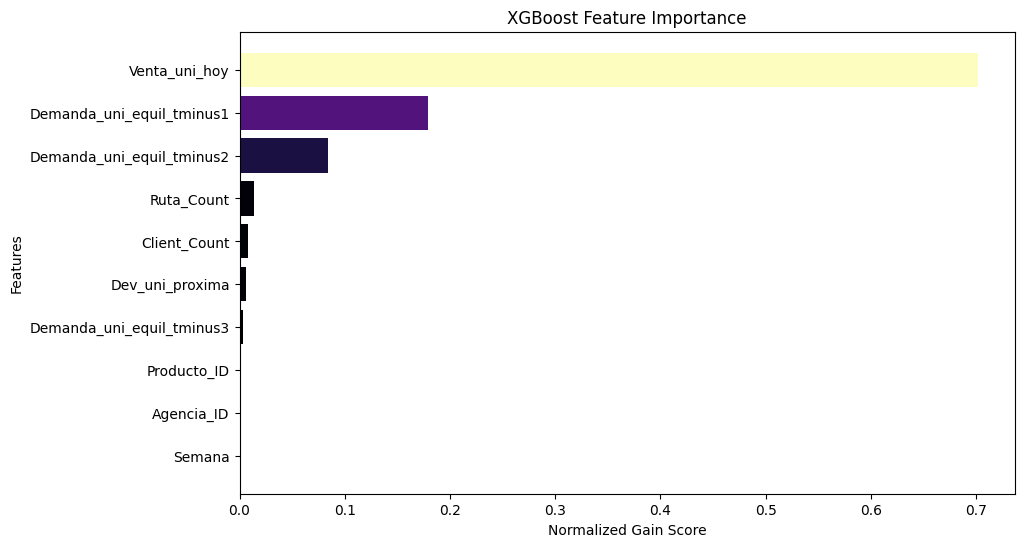

In [ ]:
plt.figure(figsize=(10, 6))
cmap = plt.get_cmap('magma')
colors = cmap(importance_df_xgb['Importance'] / max(importance_df_xgb['Importance']))
plt.barh(importance_df_xgb['Feature'], importance_df_xgb['Importance'], color=colors)
plt.xlabel('Normalized Gain Score')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()
plt.show()

## LightGBM

In [ ]:
importance_scores_lgb = model_lgb.booster_.feature_importance(importance_type='gain')
importance_df_lgb = pd.DataFrame({
    'Feature': X_train_678_lgb.columns,
    'Importance': importance_scores_lgb
})
importance_df_lgb = importance_df_lgb.sort_values(by='Importance', ascending=False)
importance_df_lgb['Importance'] = (importance_df_lgb['Importance'] / importance_df_lgb['Importance'].sum()).round(5)

importance_df_lgb = importance_df_lgb.reset_index(drop=True)
importance_df_lgb['Rank'] = importance_df_lgb.index + 1
importance_df_lgb = importance_df_lgb[['Rank', 'Feature', 'Importance']]

print("LightGBM Feature Importance:")
print(tabulate(importance_df_lgb, headers='keys', tablefmt='fancy_grid', showindex=False))

LightGBM Feature Importance:
╒════════╤═══════════════════════════╤══════════════╕
│   Rank │ Feature                   │   Importance │
╞════════╪═══════════════════════════╪══════════════╡
│      1 │ Venta_uni_hoy             │      0.72054 │
├────────┼───────────────────────────┼──────────────┤
│      2 │ Demanda_uni_equil_tminus1 │      0.26351 │
├────────┼───────────────────────────┼──────────────┤
│      3 │ Dev_uni_proxima           │      0.00474 │
├────────┼───────────────────────────┼──────────────┤
│      4 │ Ruta_Count                │      0.00426 │
├────────┼───────────────────────────┼──────────────┤
│      5 │ Client_Count              │      0.0033  │
├────────┼───────────────────────────┼──────────────┤
│      6 │ Demanda_uni_equil_tminus2 │      0.00265 │
├────────┼───────────────────────────┼──────────────┤
│      7 │ Demanda_uni_equil_tminus3 │      0.00076 │
├────────┼───────────────────────────┼──────────────┤
│      8 │ Producto_ID               │      0.00016 │

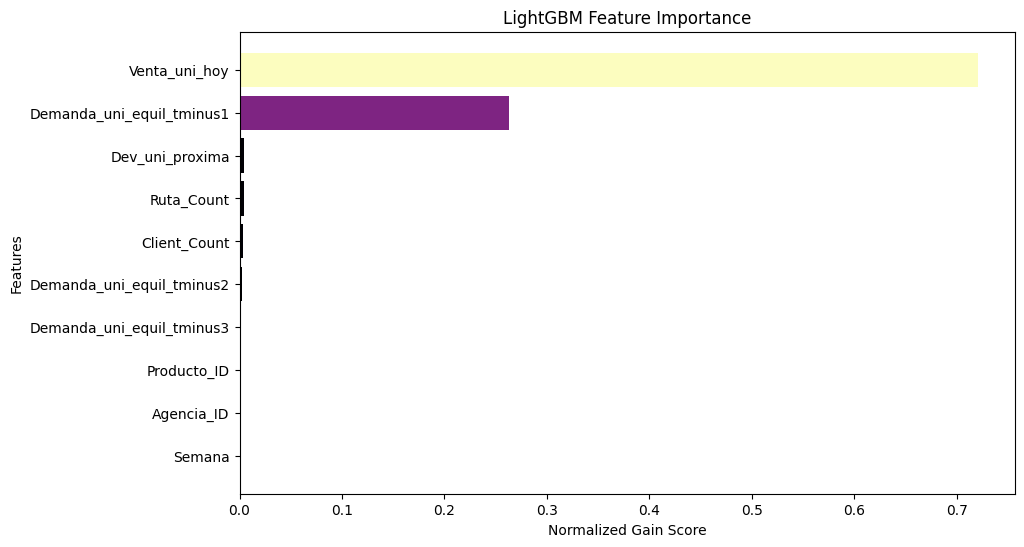

In [ ]:
plt.figure(figsize=(10, 6))
cmap = plt.get_cmap('magma')
colors = cmap(importance_df_lgb['Importance'] / max(importance_df_lgb['Importance']))
plt.barh(importance_df_lgb['Feature'], importance_df_lgb['Importance'], color=colors)
plt.xlabel('Normalized Gain Score')
plt.ylabel('Features')
plt.title('LightGBM Feature Importance')
plt.gca().invert_yaxis()
plt.show()